<h1> A3 - Predicting Car Prices <h1>

Importing the libraries

In [261]:
#Import necessary libraries
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
import warnings
from sklearn import preprocessing
warnings.filterwarnings('ignore')


<h0>Loading data<h0>

In [262]:
# Load the dataset using pandas and storing them in a dataframe variable
df = pd.read_csv('Cars.csv')

In [263]:
# Displaying the first few rows of the dataframe
df.head()

,name,year,selling_price,km_driven,fuel,seller_type,transmission,owner,mileage,engine,max_power,torque,seats
0,Maruti Swift Dzire VDI,2014,450000,145500,Diesel,Individual,Manual,First Owner,23.4 kmpl,1248 CC,74 bhp,190Nm@ 2000rpm,5.0
1,Skoda Rapid 1.5 TDI Ambition,2014,370000,120000,Diesel,Individual,Manual,Second Owner,21.14 kmpl,1498 CC,103.52 bhp,250Nm@ 1500-2500rpm,5.0
2,Honda City 2017-2020 EXi,2006,158000,140000,Petrol,Individual,Manual,Third Owner,17.7 kmpl,1497 CC,78 bhp,"12.7@ 2,700(kgm@ rpm)",5.0
3,Hyundai i20 Sportz Diesel,2010,225000,127000,Diesel,Individual,Manual,First Owner,23.0 kmpl,1396 CC,90 bhp,22.4 kgm at 1750-2750rpm,5.0
4,Maruti Swift VXI BSIII,2007,130000,120000,Petrol,Individual,Manual,First Owner,16.1 kmpl,1298 CC,88.2 bhp,"11.5@ 4,500(kgm@ rpm)",5.0


In [264]:
#Checking the statistical summary of the dataframe
df.describe()

,year,selling_price,km_driven,seats
count,8128.000000,8.128000e+03,8.128000e+03,7907.000000
mean,2013.804011,6.382718e+05,6.981951e+04,5.416719
std,4.044249,8.062534e+05,5.655055e+04,0.959588
min,1983.000000,2.999900e+04,1.000000e+00,2.000000
25%,2011.000000,2.549990e+05,3.500000e+04,5.000000
50%,2015.000000,4.500000e+05,6.000000e+04,5.000000
75%,2017.000000,6.750000e+05,9.800000e+04,5.000000
max,2020.000000,1.000000e+07,2.360457e+06,14.000000


In [265]:
#Checking the data types and non-null values in the dataframe
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 8128 entries, 0 to 8127
Data columns (total 13 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   name           8128 non-null   object 
 1   year           8128 non-null   int64  
 2   selling_price  8128 non-null   int64  
 3   km_driven      8128 non-null   int64  
 4   fuel           8128 non-null   object 
 5   seller_type    8128 non-null   object 
 6   transmission   8128 non-null   object 
 7   owner          8128 non-null   object 
 8   mileage        7907 non-null   object 
 9   engine         7907 non-null   object 
 10  max_power      7913 non-null   object 
 11  torque         7906 non-null   object 
 12  seats          7907 non-null   float64
dtypes: float64(1), int64(3), object(9)
memory usage: 825.6+ KB


In [266]:
#Checking the number of rows and columns in the dataframe
df.shape

(8128, 13)

In [267]:
#Checking the column names in the dataframe
df.columns

Index(['name', 'year', 'selling_price', 'km_driven', 'fuel', 'seller_type',
       'transmission', 'owner', 'mileage', 'engine', 'max_power', 'torque',
       'seats'],
      dtype='object')

In [268]:
#Checking for unique values in "owner" column
df['owner'].unique()

array(['First Owner', 'Second Owner', 'Third Owner',
       'Fourth & Above Owner', 'Test Drive Car'], dtype=object)

<h1> Task 1: Preparing the datasets <h1>

Create a mapping dictionary for the 'Owner' column


In [269]:
#Mapping the owner column to numerical values.
ownermap = {                  
    "First Owner":1,
    "Second Owner":2, 
    "Third Owner":3, 
    "Fourth & Above Owner":4, 
    "Test Drive Car":5
    }    


In [270]:
#Checking if the owner column exists in the dataframe and then mapping it.
if 'owner' in df.columns:      
    df['owner'] = df['owner'].map(ownermap)

In [271]:
#Checking if mapping is done correctly
df.owner.unique() 

array([1, 2, 3, 4, 5])

Removing the rows of 'Fuel' column with values of LPG and CNG 

In [272]:
#Getting the count of unique values in the 'Fuel' column
df['fuel'].unique()

array(['Diesel', 'Petrol', 'LPG', 'CNG'], dtype=object)

In [273]:
#Storing the unique values to remove in an array
fuel_to_remove = ['CNG', 'LPG']

In [274]:
#Removing the unwanted fuel types from the dataframe
df = df[~df['fuel'].isin(fuel_to_remove)]

In [275]:
#checking if the unwanted fuel types are removed
df['fuel'].unique()

array(['Diesel', 'Petrol'], dtype=object)

Removing "kmpl" and converting the column to numerical type for feature mileage

In [276]:
#Getting the values of mileage column
df['mileage'].head()

0     23.4 kmpl
1    21.14 kmpl
2     17.7 kmpl
3     23.0 kmpl
4     16.1 kmpl
Name: mileage, dtype: object

In [277]:
#Removing the "kmpl" from the mileage column
df['mileage']= df['mileage'].str.split( ).str[0]

In [278]:
#Converting the mileage column to float type
df['mileage'] = df['mileage'].astype(float)

In [279]:
#Checking if the conversation is done correctly
df['mileage'].dtype

dtype('float64')

Removing "CC" and converting the column to numerical type for feature engine

In [280]:
#Getting the values of 'engine' feature column
df['engine'].head()

0    1248 CC
1    1498 CC
2    1497 CC
3    1396 CC
4    1298 CC
Name: engine, dtype: object

In [281]:
#Removing the 'CC' from the engine column using str.split() method
df['engine'] = df['engine'].str.split( ).str[0]

In [282]:
#Verifying the changes in the engine column
df['engine'].head()

0    1248
1    1498
2    1497
3    1396
4    1298
Name: engine, dtype: object

In [283]:
#converting the data type of engine column to float
df['engine'] = df['engine'].astype(float)

In [284]:
#verifying the data type of engine column
df['engine'].dtype

dtype('float64')

Removing "bhp" and converting the column to numerical type for feature max_power

In [285]:
#Getting the values of the column 'max_power'
df['max_power'].head()

0        74 bhp
1    103.52 bhp
2        78 bhp
3        90 bhp
4      88.2 bhp
Name: max_power, dtype: object

In [286]:
#Removing the 'bhp' from the max_power column using str.split() method
df['max_power'] = df['max_power'].str.split( ).str[0]

In [287]:
#Converting the data type of max_power column to float
df['max_power'] = df['max_power'].astype(float)

In [288]:
#Verifying the changes
df['engine'].head()

0    1248.0
1    1498.0
2    1497.0
3    1396.0
4    1298.0
Name: engine, dtype: float64

In [289]:
#Converting the mileage column to float type
df['mileage'] = df['mileage'].astype(float)

In [290]:
#Verifying the changes
df['engine'].dtypes

dtype('float64')

Taking only the first word for the feature brand

In [291]:
df.columns

Index(['name', 'year', 'selling_price', 'km_driven', 'fuel', 'seller_type',
       'transmission', 'owner', 'mileage', 'engine', 'max_power', 'torque',
       'seats'],
      dtype='object')

In [292]:
#Renaming the column 'name' to 'brand'
df.rename(columns={'name':'brand'}, inplace=True)
#checking the changes
df.columns

Index(['brand', 'year', 'selling_price', 'km_driven', 'fuel', 'seller_type',
       'transmission', 'owner', 'mileage', 'engine', 'max_power', 'torque',
       'seats'],
      dtype='object')

In [293]:
#Getting information about the column 'brand'
df['brand'].head()

0          Maruti Swift Dzire VDI
1    Skoda Rapid 1.5 TDI Ambition
2        Honda City 2017-2020 EXi
3       Hyundai i20 Sportz Diesel
4          Maruti Swift VXI BSIII
Name: brand, dtype: object

In [294]:
#Only taking the first word from the brand column by using the str.split() method
df['brand'] = df['brand'].str.split( ).str[0]

In [295]:
#Verifying the changes
df['brand'].head()

0     Maruti
1      Skoda
2      Honda
3    Hyundai
4     Maruti
Name: brand, dtype: object

Dropping the feature torque

In [296]:
#Removing the feature 'torque' from the dataframe using the drop() method
df = df.drop(['torque'], axis=1)

Removing the 'Test Drive Cars' i.e. owner = 5 from the data set. 

In [297]:
#Removing the 'Owner=5' from the dataframe using the query() method
df = df.query("owner != '5'")

In [298]:
#Verifying the changes on the owner column
df['owner'].unique()

array([1, 2, 3, 4, 5])

In [299]:
#Checking the cleaned dataframe
df.head()

,brand,year,selling_price,km_driven,fuel,seller_type,transmission,owner,mileage,engine,max_power,seats
0,Maruti,2014,450000,145500,Diesel,Individual,Manual,1,23.40,1248.0,74.00,5.0
1,Skoda,2014,370000,120000,Diesel,Individual,Manual,2,21.14,1498.0,103.52,5.0
2,Honda,2006,158000,140000,Petrol,Individual,Manual,3,17.70,1497.0,78.00,5.0
3,Hyundai,2010,225000,127000,Diesel,Individual,Manual,1,23.00,1396.0,90.00,5.0
4,Maruti,2007,130000,120000,Petrol,Individual,Manual,1,16.10,1298.0,88.20,5.0


Changing the columns 'brand', 'fuel, 'seller_type' and 'trasmission' to numerical format.

In [300]:
#Importing the LabelEncoder from sklearn library
from sklearn.preprocessing import LabelEncoder

#Initializing the LabelEncoder
label_encoder_brand = LabelEncoder()
label_encoder_fuel = LabelEncoder()
label_encoder_seller_type = LabelEncoder()
label_encoder_transmission = LabelEncoder()

#Transforming the categorical columns using the fit_transform() method
df['brand'] = label_encoder_brand.fit_transform(df['brand'])
original_brands = label_encoder_brand.classes_.tolist()
df['fuel'] = label_encoder_fuel.fit_transform(df['fuel'])
df['seller_type'] = label_encoder_seller_type.fit_transform(df['seller_type'])      
df['transmission'] = label_encoder_transmission.fit_transform(df['transmission'])


In [301]:
#Checking for the changes made
df.head()

,brand,year,selling_price,km_driven,fuel,seller_type,transmission,owner,mileage,engine,max_power,seats
0,20,2014,450000,145500,0,1,1,1,23.40,1248.0,74.00,5.0
1,27,2014,370000,120000,0,1,1,2,21.14,1498.0,103.52,5.0
2,10,2006,158000,140000,1,1,1,3,17.70,1497.0,78.00,5.0
3,11,2010,225000,127000,0,1,1,1,23.00,1396.0,90.00,5.0
4,20,2007,130000,120000,1,1,1,1,16.10,1298.0,88.20,5.0


In [302]:
#Creating a csv of the encoded data set.
df.to_csv('le_cars_data.csv', sep = ',', index=False, encoding='utf-8 ')

<h1>Exploratory Data Analysis<h1>

In [303]:
#Seperating the numerical and categorical columns from the dataframe
#Excluding the column 'selling_price' from the numerical columns using df.loc method and storing in a variable 

df_copy = df.loc[:, df.columns != 'selling_price']

#Seperating the numerical and categorical columns from the dataframe

num_cols = df_copy.select_dtypes(include=['int64', 'float64'])
cat_cols = df_copy.select_dtypes(exclude=['int64', 'float64'])

In [304]:
#Verifying the changes made to the dataset
num_cols.columns, cat_cols.columns

(Index(['brand', 'year', 'km_driven', 'fuel', 'seller_type', 'transmission',
        'owner', 'mileage', 'engine', 'max_power', 'seats'],
       dtype='object'),
 Index([], dtype='object'))

<h1>Univariate Analysis<h1>

Distribution plot

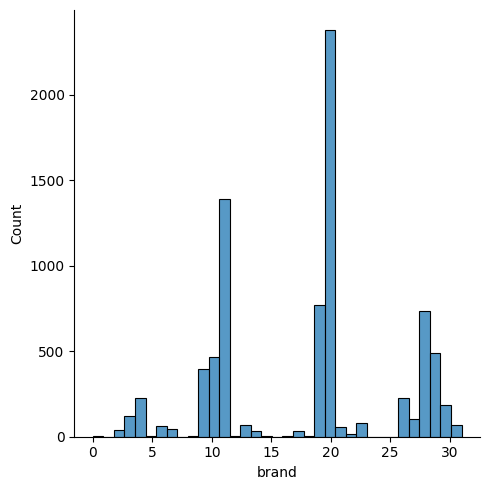

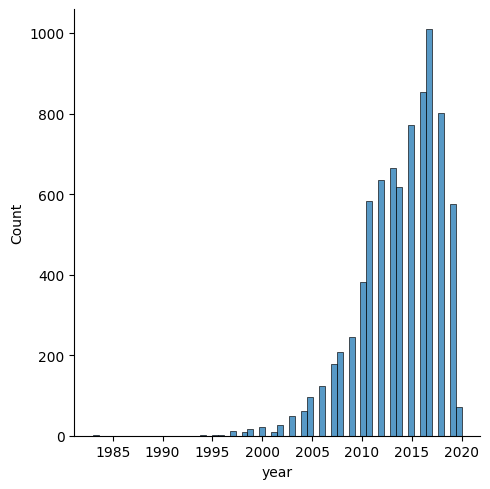

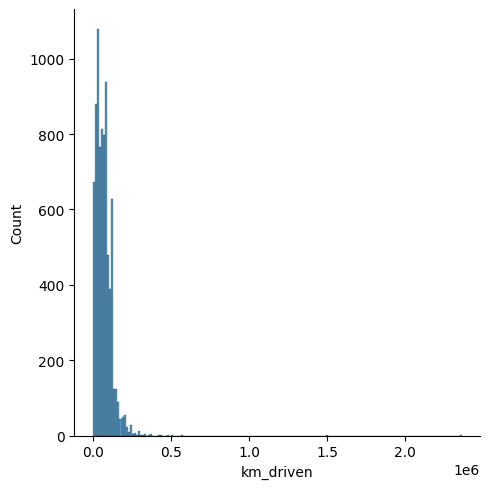

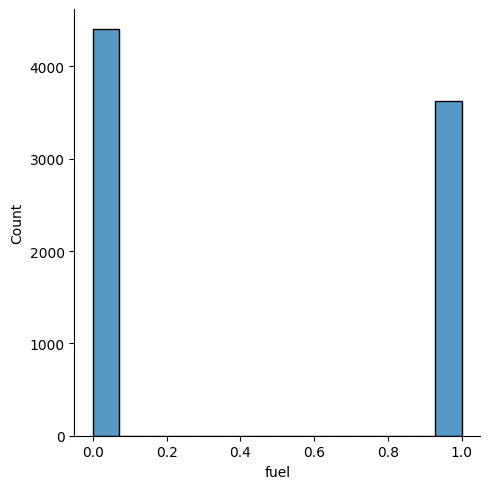

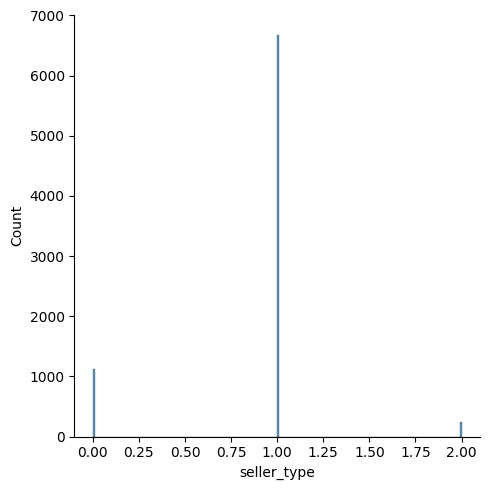

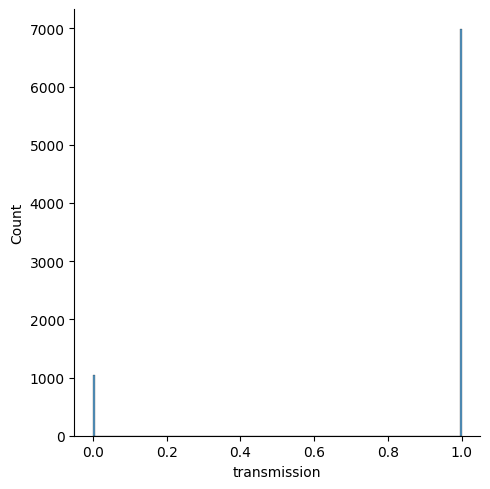

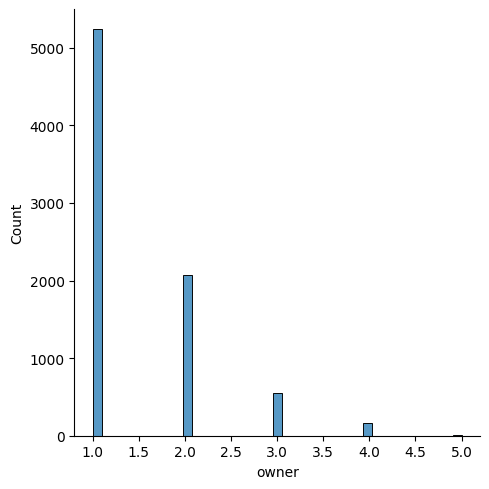

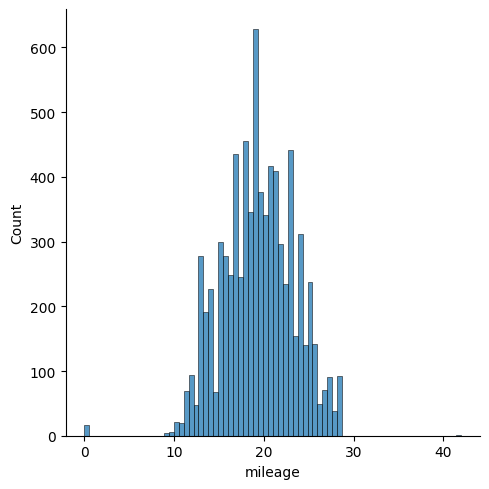

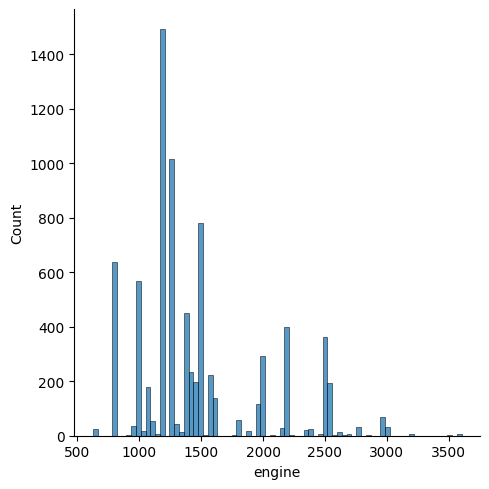

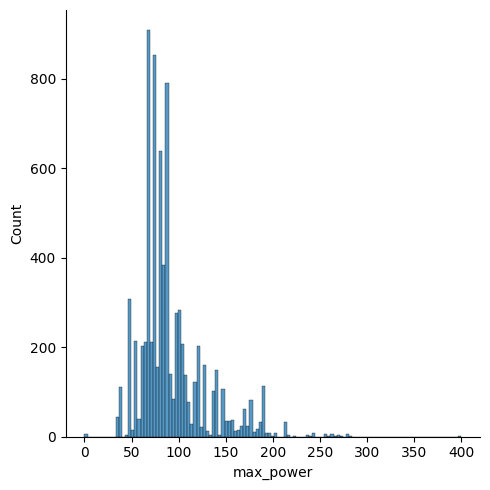

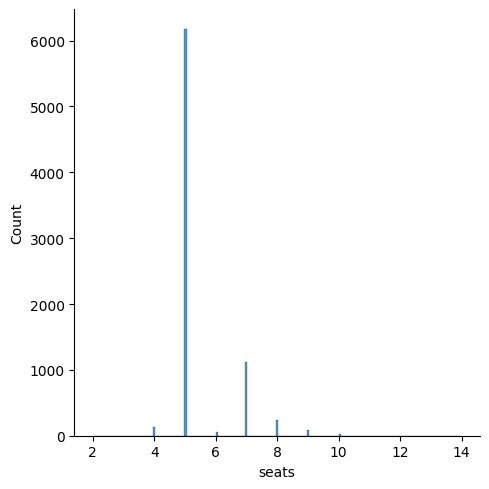

In [305]:
#Analysing the count of all nummerical colums using the distribution plot
for col in num_cols.columns:
    sns.displot(df, x=df[col])

<h1>Multivariate Analysis<h1>

Scatterplot

<Axes: xlabel='brand', ylabel='selling_price'>

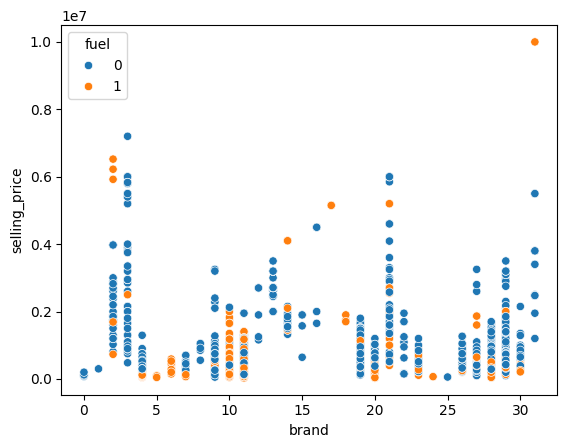

In [306]:
#Plotting the features in the scatter plot to see the relationship between the features and selling_price by keeping fuel as hue
sns.scatterplot(x=df['brand'], y=df['selling_price'], hue=df['fuel'])

<Axes: xlabel='year', ylabel='selling_price'>

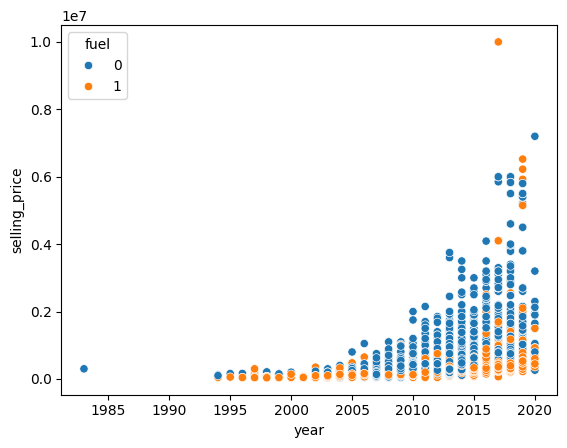

In [307]:
sns.scatterplot(x=df['year'], y=df['selling_price'], hue=df['fuel'])

<Axes: xlabel='km_driven', ylabel='selling_price'>

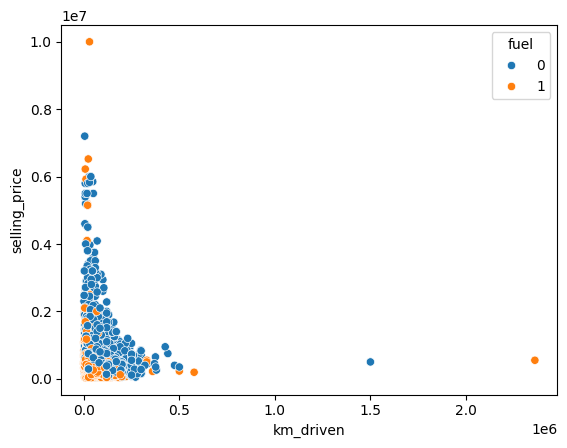

In [308]:
sns.scatterplot(x=df['km_driven'], y=df['selling_price'], hue=df['fuel'])

<Axes: xlabel='mileage', ylabel='selling_price'>

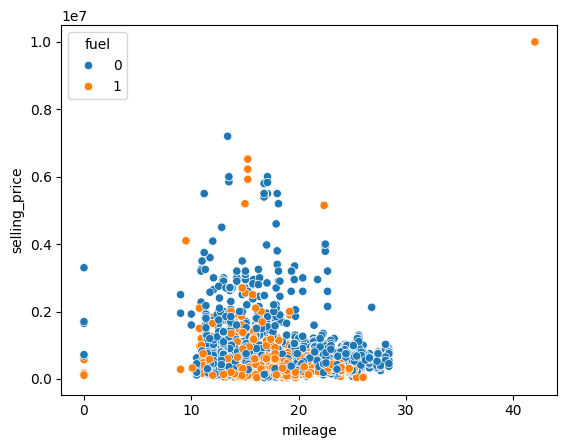

In [309]:
sns.scatterplot(x=df['mileage'], y=df['selling_price'], hue=df['fuel'])

<Axes: xlabel='engine', ylabel='selling_price'>

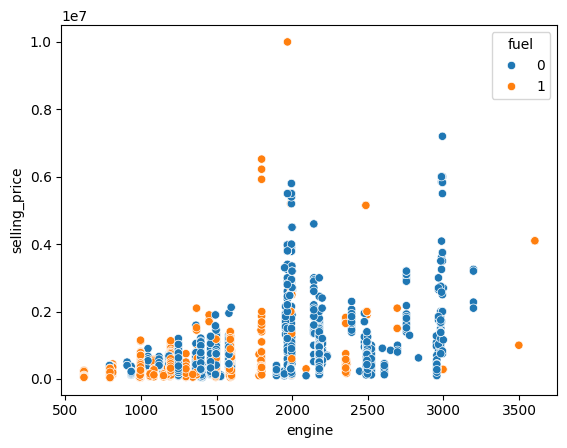

In [310]:
sns.scatterplot(x=df['engine'], y=df['selling_price'], hue=df['fuel'])

<Axes: xlabel='max_power', ylabel='selling_price'>

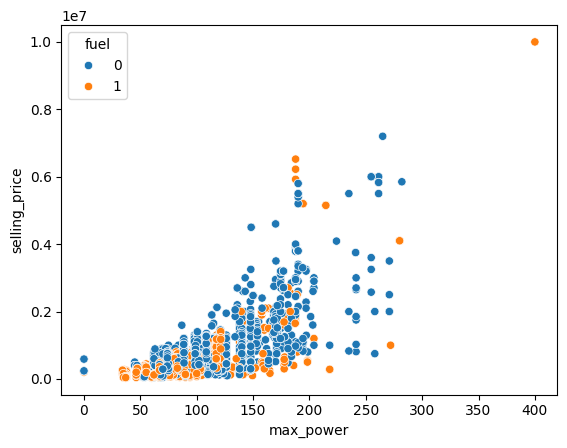

In [311]:
sns.scatterplot(x=df['max_power'], y=df['selling_price'], hue=df['fuel'])

<h1>Correlation matrix<h1>

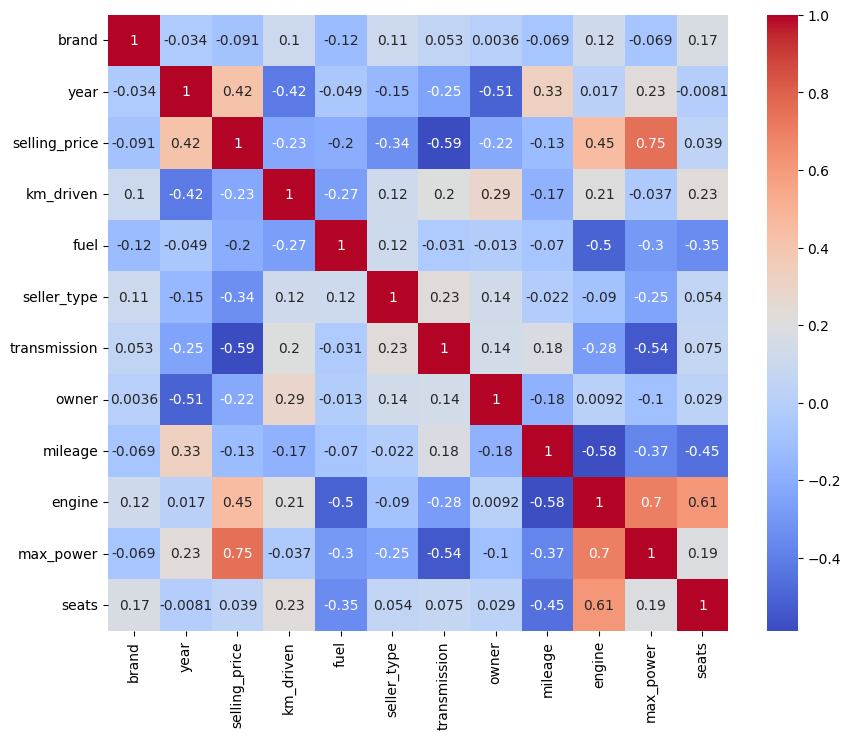

In [312]:
plt.figure(figsize=(10,8))
sns.heatmap(df.corr(), annot=True, cmap='coolwarm')
plt.show()

<h1>Feature Selection<h1>

In [313]:
df['selling_price'] = pd.qcut(x=df['selling_price'], q=4, labels=range(0, 4))
df.head()

,brand,year,selling_price,km_driven,fuel,seller_type,transmission,owner,mileage,engine,max_power,seats
0,20,2014,1,145500,0,1,1,1,23.40,1248.0,74.00,5.0
1,27,2014,1,120000,0,1,1,2,21.14,1498.0,103.52,5.0
2,10,2006,0,140000,1,1,1,3,17.70,1497.0,78.00,5.0
3,11,2010,0,127000,0,1,1,1,23.00,1396.0,90.00,5.0
4,20,2007,0,120000,1,1,1,1,16.10,1298.0,88.20,5.0


In [314]:
#The important features that were selected based on the correlation and ppscore matrix are stored in variable X

# Main features = max power, mileage, engine and brand

X = df[['max_power', 'mileage', 'year', 'brand']]

#Selling price is stored in variable Y, which is the target variable. Here, we have logarithmically transformed the selling_price column to ensure stability of prediction.
y = df['selling_price']

In [315]:
k = len(set(y))
k

4

<h1>Data Splitting<h1>

We are splitting the values into train set and test set. 

In [316]:
from sklearn.model_selection import train_test_split
#Splitting the dataset into training and testing sets using train_test_split() method
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=40)

<h1>Preprocessing<h1>

Checking for null values in X_train 

In [317]:
#Checking for null values in the training and testing sets
X_train[['max_power', 'mileage', 'year', 'brand']].isnull().sum()

max_power    146
mileage      151
year           0
brand          0
dtype: int64

In [318]:
X_test[['max_power', 'mileage', 'year', 'brand']].isnull().sum()

max_power    62
mileage      63
year          0
brand         0
dtype: int64

In [319]:
#Checking for null values in y_train
y_train.isnull().sum()

np.int64(0)

In [320]:
#Checking for null values in y_train
y_test.isnull().sum()

np.int64(0)

<h1>Finding the mean, median, and mode of the features to fill up the null values<h1>

Here only max_power and mileage have null values among the features.

In [321]:
X_train['max_power'].median() #Finding the median of max_power because the distribution is right skewed and using mean to fill the null values will affect the distribution of the data.


np.float64(83.1)

In [322]:
X_train['mileage'].mean() #Finding the mean of mileage because the distribution is nearly normal and mean can be used to fill the null values.

np.float64(19.35297697368421)

In [323]:
X_test['max_power'].median()

np.float64(82.0)

In [324]:
X_test['mileage'].mean()

np.float64(19.47756710694504)

<h1>Filling the missing numerical values<h1>

Using the obtained median and mean of test and train dataset to fill in the null values. 

In [325]:
X_train['max_power'].fillna(X_train['max_power'].median(), inplace=True)
X_train['mileage'].fillna(X_train['mileage'].mean(), inplace=True)
X_test['max_power'].fillna(X_test['max_power'].median(), inplace=True)
X_test['mileage'].fillna(X_test['mileage'].mean(), inplace=True)

In [326]:
#Verifying if the null values are filled in training set    
X_train[['max_power', 'mileage', 'brand', 'year']].isnull().sum()

max_power    0
mileage      0
brand        0
year         0
dtype: int64

In [327]:
#Verifying if the null values are filled in test set    
X_test[['max_power', 'mileage', 'brand', 'year']].isnull().sum()

max_power    0
mileage      0
brand        0
year         0
dtype: int64

In [328]:
#Verifying if the null values are filled in y_train and y_test
y_train.isnull().sum(), y_test.isnull().sum()

(np.int64(0), np.int64(0))

<h1>Checking for outliers<h1>

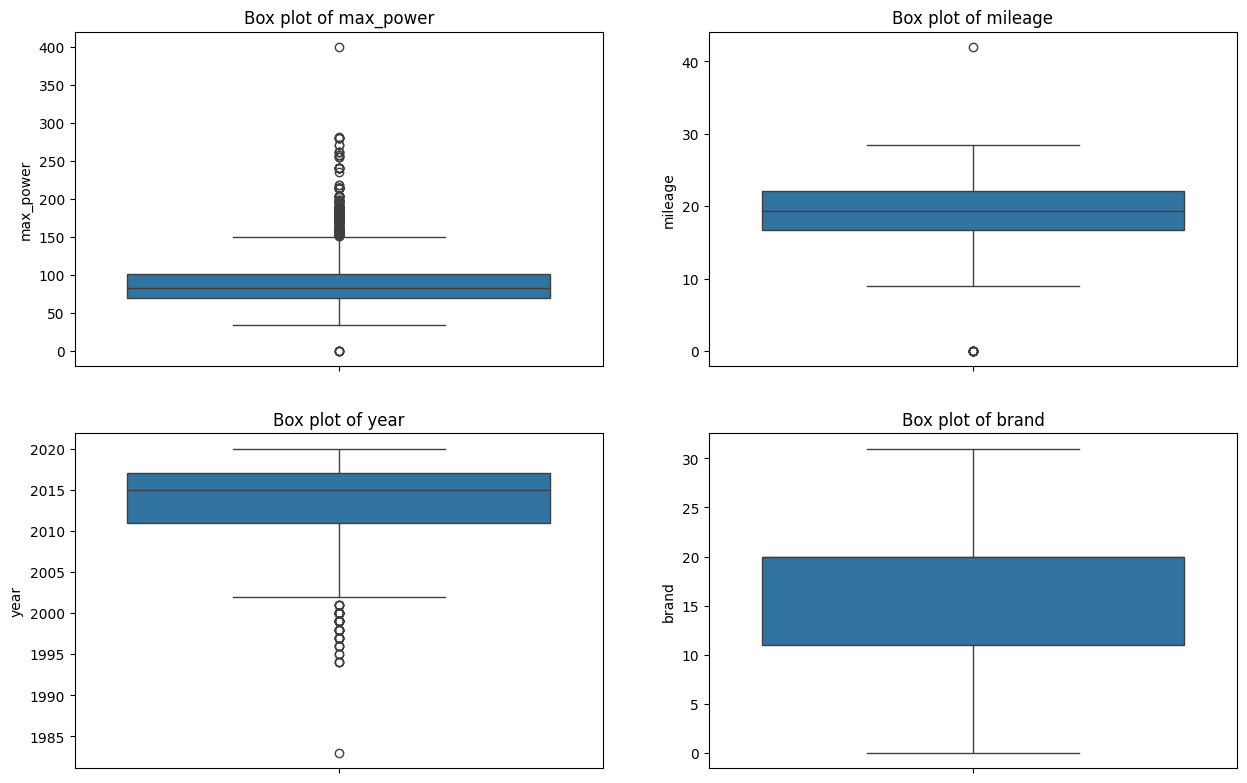

In [329]:
#Checking the outliers in the training set using box plot 
#Creating a dictionary to store the columns and their respective values

col_dict = {'max_power': 1, 'mileage': 2, 'year': 3, 'brand': 4}

#Using boxplot to visualize the outliers in the training set
plt.figure(figsize=(15,20))
for i, col in col_dict.items():
    plt.subplot(4,2,col)
    sns.boxplot(X_train[i])
    plt.title(f'Box plot of {i}')
plt.show()

In [330]:
#To check the impact of outliers on the efficiency of the model, we will define a function to calculate the outliers of each feature using the IQR method

def calculate_outliers(col, data=X_train):
    q75 = np.percentile(data[col], 75)
    q25 = np.percentile(data[col], 25)
    iqr = q75 - q25
    min_val = q25 - (1.5 * iqr)
    max_val = q75 + (1.5 * iqr)

    calculate_outliers = len(np.where((data[col] < min_val) | (data[col] > max_val))[0])
    percentage_outliers = round(calculate_outliers / len(data) * 100, 2)

    if calculate_outliers > 0:
        print(f'Feature {col} has {calculate_outliers} outliers which is {percentage_outliers}% of the data')
    else:
        print(f'Feature {col} has no outliers')

In [331]:
for col in X_train.columns:
    calculate_outliers(col)

Feature max_power has 412 outliers which is 7.33% of the data
Feature mileage has 13 outliers which is 0.23% of the data
Feature year has 55 outliers which is 0.98% of the data
Feature brand has no outliers


Since the percentage of the outliers are low in the dataset, we are neglecting them for analysis

<h1>Scaling the dataset<h1>

In [332]:
#Importing the library from sklearn for scaling the features, excluding the categorical features

from sklearn.preprocessing import StandardScaler
num_cols = ['max_power', 'mileage', 'year']
scaler = StandardScaler()
X_train[num_cols] = scaler.fit_transform(X_train[num_cols])
X_test[num_cols] = scaler.transform(X_test[num_cols])


In [333]:
#Verifying the changes made
print(X_train.shape)
print(X_test.shape)
print(y_train.shape)
print(y_test.shape)

(5623, 4)
(2410, 4)
(5623,)
(2410,)


In [334]:
#Encoding of Y_train
Y_train_encoded = pd.get_dummies(y_train)

In [335]:
X_train = X_train.to_numpy()
X_test  = X_test.to_numpy()
Y_train_encoded = Y_train_encoded.to_numpy()
y_test  = y_test.to_numpy()

In [336]:
#Checking the shape
print("Shape of X_train: ", X_train.shape)
print("Shape of X_test: ", X_test.shape)
print("Shape of y_train: ", Y_train_encoded.shape)
print("Shape of y_test: ", y_test.shape)

Shape of X_train:  (5623, 4)
Shape of X_test:  (2410, 4)
Shape of y_train:  (5623, 4)
Shape of y_test:  (2410,)


In [337]:
import time
from sklearn.metrics import classification_report
import mlflow
import os

In [338]:
os.environ["MLFLOW_TRACKING_USERNAME"] = "admin"
os.environ["MLFLOW_TRACKING_PASSWORD"] = "password"

In [339]:
mlflow.set_tracking_uri("https://mlflow.ml.brain.cs.ait.ac.th/")
mlflow.set_experiment("st126222-a3")


<Experiment: artifact_location='mlflow-artifacts:/442617570942485080', creation_time=1759469947454, experiment_id='442617570942485080', last_update_time=1759469947454, lifecycle_stage='active', name='st126222-a3', tags={'mlflow.experimentKind': 'custom_model_development'}>

In [340]:
class LogisticRegression:

    def __init__(self, regularization, k, n, method, alpha=0.001, max_iter=5000):
        self.regularization = regularization
        self.k = int(k)
        self.n = int(n)
        self.alpha = alpha
        self.max_iter = max_iter
        self.method = method
        self.W = None  # Will be initialized later
        self.losses = []

    def fit(self, X, Y):
        self.W = np.random.rand(self.n, self.k)
        params = {
            "reg": type(self).__name__,
            "method": self.method,
            "k": int(self.k),
            "n": int(self.n),
            "alpha": self.alpha,
            "max_iter": self.max_iter
        }
        mlflow.log_params(params=params)

        if self.method == "batch":
            start_time = time.time()
            for i in range(self.max_iter):
                loss, grad = self.gradient(X, Y)
                self.losses.append(loss)
                self.W = self.W - self.alpha * grad
                if i % 500 == 0:
                    print(f"Loss at iteration {i}", loss)
                    mlflow.log_metric(key="train_loss", value=loss, step=i)
            print(f"time taken: {time.time() - start_time}")

        elif self.method == "minibatch":
            start_time = time.time()
            batch_size = int(0.3 * X.shape[0])
            for i in range(self.max_iter):
                ix = np.random.randint(0, X.shape[0])  # With replacement
                batch_X = X[ix:ix + batch_size]
                batch_Y = Y[ix:ix + batch_size]
                loss, grad = self.gradient(batch_X, batch_Y)
                self.losses.append(loss)
                self.W = self.W - self.alpha * grad
                if i % 500 == 0:
                    print(f"Loss at iteration {i}", loss)
                    mlflow.log_metric(key="train_loss", value=loss, step=i)
            print(f"time taken: {time.time() - start_time}")

        elif self.method == "sto":
            start_time = time.time()
            list_of_used_ix = []
            for i in range(self.max_iter):
                idx = np.random.randint(X.shape[0])
                while i in list_of_used_ix:
                    idx = np.random.randint(X.shape[0])
                X_train = X[idx, :].reshape(1, -1)
                Y_train = Y[idx]
                loss, grad = self.gradient(X_train, Y_train)
                self.losses.append(loss)
                self.W = self.W - self.alpha * grad

                list_of_used_ix.append(i)
                if len(list_of_used_ix) == X.shape[0]:
                    list_of_used_ix = []
                if i % 500 == 0:
                    print(f"Loss at iteration {i}", loss)
                    mlflow.log_metric(key="train_loss", value=loss, step=i)
            print(f"time taken: {time.time() - start_time}")

        else:
            raise ValueError('Method must be one of the followings: "batch", "minibatch" or "sto".')

    def gradient(self, X, Y):
        # X: (m, n), Y: (m, k) one-hot
        m = X.shape[0]
        h = self.h_theta(X, self.W)              # (m, k)

        # Safe log to avoid log(0)
        eps = 1e-15
        h_safe = np.clip(h, eps, 1 - eps)

        # Average cross-entropy loss
        loss = -np.sum(Y * np.log(h_safe)) / m

        # Add regularization to the LOSS as well
        if self.regularization:
            loss += self.regularization(self.W) / m

        # Properly averaged gradient
        error = h - Y                             # (m, k)
        grad = (X.T @ error) / m                  # (n, k)

        # Add regularization to the GRAD
        if self.regularization:
            grad += self.regularization.derivation(self.W) / m
        return loss, grad

    def softmax(self, theta_t_x):
        theta_t_x = theta_t_x - np.max(theta_t_x, axis=1, keepdims=True)
        exp_scores = np.exp(theta_t_x)
        return exp_scores / np.sum(exp_scores, axis=1, keepdims=True)

    def softmax_grad(self, X, error):
        return X.T @ error

    def h_theta(self, X, W):
        return self.softmax(X @ W)

    def predict(self, X_test):
        return np.argmax(self.h_theta(X_test, self.W), axis=1)

    def plot(self):
        plt.plot(np.arange(len(self.losses)), self.losses, label="Train Losses")
        plt.title("Losses")
        plt.xlabel("epoch")
        plt.ylabel("losses")
        plt.legend()

    def accuracy(self, y_test, y_pred):
        correct_predictions = np.sum(y_test == y_pred)
        total_predictions = y_test.shape[0]
        return correct_predictions / total_predictions

    def precision(self, y_test, y_pred, c=0):
        true_positives = np.sum((y_test == c) & (y_pred == c))
        false_positives = np.sum((y_test != c) & (y_pred == c))
        if true_positives + false_positives == 0:
            return 0
        else:
            return true_positives / (true_positives + false_positives)

    def recall(self, y_test, y_pred, c=0):

        true_positives = np.sum((y_test == c) & (y_pred == c))
        false_negatives = np.sum((y_test == c) & (y_pred != c))
        if true_positives + false_negatives == 0:
            return 0
        else:
            return true_positives / (true_positives + false_negatives)

    def f1_score(self, y_test, y_pred, c=0):

        precision = self.precision(y_test, y_pred, c)
        recall = self.recall(y_test, y_pred, c)
        if precision + recall == 0:
            return 0
        else:
            return 2 * precision * recall / (precision + recall)

    def macro_precision(self, y_test, y_pred):

        precisions = [self.precision(y_test, y_pred, c) for c in range(self.k)]
        return np.sum(precisions) / self.k

    def macro_recall(self, y_test, y_pred):

        recalls = [self.recall(y_test, y_pred, c) for c in range(self.k)]
        return np.sum(recalls) / self.k

    def macro_f1(self, y_test, y_pred):

        f1s = [self.f1_score(y_test, y_pred, c) for c in range(self.k)]
        return np.sum(f1s) / self.k

    def weighted_precision(self, y_test, y_pred):
  
        class_counts = [np.count_nonzero(y_test == c) for c in range(self.k)]
        precisions = [class_counts[c] / len(y_test) * self.precision(y_test, y_pred, c) for c in range(self.k)]
        return np.sum(precisions)

    def weighted_recall(self, y_test, y_pred):

        class_counts = [np.count_nonzero(y_test == c) for c in range(self.k)]
        recalls = [class_counts[c] / len(y_test) * self.recall(y_test, y_pred, c) for c in range(self.k)]
        return np.sum(recalls)

    def weighted_f1(self, y_test, y_pred):

        class_counts = [np.count_nonzero(y_test == c) for c in range(self.k)]
        f1s = [class_counts[c] / len(y_test) * self.f1_score(y_test, y_pred, c) for c in range(self.k)]
        return np.sum(f1s)

    def classification_report(self, y_test, y_pred):

        cols = ["precision", "recall", "f1-score"]
        idx = list(range(self.k)) + ["accuracy", "macro", "weighted"]

        report = [[self.precision(y_test, y_pred, c),
                   self.recall(y_test, y_pred, c),
                   self.f1_score(y_test, y_pred, c)] for c in range(self.k)]

        report.append(["", "", self.accuracy(y_test, y_pred)])

        report.append([self.macro_precision(y_test, y_pred),
                       self.macro_recall(y_test, y_pred),
                       self.macro_f1(y_test, y_pred)])

        report.append([self.weighted_precision(y_test, y_pred),
                       self.weighted_recall(y_test, y_pred),
                       self.weighted_f1(y_test, y_pred)])

        return pd.DataFrame(report, index=idx, columns=cols)

In [342]:
class RidgePenalty:

    def __init__(self, l):
        self.l = l

    def __call__(self, theta):
        return self.l * np.sum(np.square(theta))

    def derivation(self, theta):
        return self.l * 2 * theta

class Ridge(LogisticRegression):

    def __init__(self, l, k, n, method, alpha=0.001, max_iter=5000):
        regularization = RidgePenalty(l)
        super().__init__(regularization, k, n, method, alpha, max_iter)

class Normal(LogisticRegression):

    def __init__(self, k, n, method, alpha=0.001, max_iter=5000):
        super().__init__(regularization=None, k=k, n=n, method=method, alpha=alpha, max_iter=max_iter)


In [343]:
import sys

def str_to_class(classname):
    return getattr(sys.modules[__name__], classname)

In [354]:
regs = ["Normal", "Ridge"]
methods = ["batch", "minibatch", "sto"]
alphas = [0.01, 0.001, 0.0001]
best_model = None
best_train_loss = float('inf')
best_reg_name = ""
best_method = ""

for reg in regs:
    for method in methods:
        for alpha in alphas:
            if reg == "Normal":
                params = {"k": k, "n":X_train.shape[1], "method": method, "alpha": alpha, "max_iter": 10000}
            else:
                params = {"k": k, "n":X_train.shape[1], "method": method, "l": 0.1, "alpha": alpha, "max_iter": 10000}
            
            with mlflow.start_run(run_name=f"reg-{reg}-method-{params['method']}-alpha-{params['alpha']}"):
                print("="*30)
                print(reg, method)
                print(f"alpha: {alpha}")
                print("="*30)
                type_of_regression = str_to_class(reg)    #Normal, Ridge
                model = type_of_regression(**params)  
                model.fit(X_train, Y_train_encoded)
                yhat = model.predict(X_test)

                accuracy = model.accuracy(y_test, yhat)
                mlflow.log_metric(key="accuracy", value=accuracy)

                for c in range(k):
                    f1 = model.f1_score(y_test, yhat, c)
                    precision = model.precision(y_test, yhat, c)
                    recall = model.recall(y_test, yhat, c)
                    mlflow.log_metric(key=f"class_{c}_f1", value=f1)
                    mlflow.log_metric(key=f"class_{c}_recall", value=recall)
                    mlflow.log_metric(key=f"class_{c}_precision", value=precision)
                
                # Get the final training loss
                final_train_loss = model.losses[-1]
                print(f"Final Training Loss: {final_train_loss}")
                
                # Compare the current model's training loss with the best so far
                if final_train_loss < best_train_loss:
                    best_train_loss = final_train_loss
                    best_model = model
                    best_reg_name = reg
                    best_method = method

                signature = mlflow.models.infer_signature(X_train, model.predict(X_train))
                mlflow.sklearn.log_model(model, name='model', signature=signature)                

        mlflow.end_run()

mlflow.end_run()

Normal batch
alpha: 0.01
Loss at iteration 0 6.917298901322403
Loss at iteration 500 1.0143461901860302
Loss at iteration 1000 0.9299357607137992
Loss at iteration 1500 0.8909880660457434
Loss at iteration 2000 0.8679449034338557
Loss at iteration 2500 0.8526838356632752
Loss at iteration 3000 0.8418716310023614
Loss at iteration 3500 0.8338574077618752
Loss at iteration 4000 0.8277225033431471
Loss at iteration 4500 0.8229118746927121
Loss at iteration 5000 0.8190688430941218
Loss at iteration 5500 0.8159529980620436
Loss at iteration 6000 0.8133960640651283
Loss at iteration 6500 0.8112766220748742
Loss at iteration 7000 0.8095048551949441
Loss at iteration 7500 0.8080129341883356
Loss at iteration 8000 0.8067487321002725
Loss at iteration 8500 0.8056715861081603
Loss at iteration 9000 0.8047493633401864
Loss at iteration 9500 0.8039563827846886
time taken: 14.303831815719604
Final Training Loss: 0.8032731865964094


2025/10/04 14:07:37 WARNING mlflow.utils.environment: Failed to resolve installed pip version. ``pip`` will be added to conda.yaml environment spec without a version specifier.


🏃 View run reg-Normal-method-batch-alpha-0.01 at: https://mlflow.ml.brain.cs.ait.ac.th/#/experiments/442617570942485080/runs/bd618604107f4c2e9686925cd8cda407
🧪 View experiment at: https://mlflow.ml.brain.cs.ait.ac.th/#/experiments/442617570942485080
Normal batch
alpha: 0.001
Loss at iteration 0 4.429272435394426
Loss at iteration 500 1.534130239198065
Loss at iteration 1000 1.4005921487978101
Loss at iteration 1500 1.302760724965179
Loss at iteration 2000 1.2315492381861748
Loss at iteration 2500 1.1786696375458574
Loss at iteration 3000 1.1381853902575918
Loss at iteration 3500 1.1062127047223258
Loss at iteration 4000 1.080252926031754
Loss at iteration 4500 1.0586746260617226
Loss at iteration 5000 1.040384408786265
Loss at iteration 5500 1.0246280018423528
Loss at iteration 6000 1.0108702157951959
Loss at iteration 6500 0.9987212490219259
Loss at iteration 7000 0.9878903632365262
Loss at iteration 7500 0.9781560191771285
Loss at iteration 8000 0.9693461399816586
Loss at iteration 8

2025/10/04 14:08:05 WARNING mlflow.utils.environment: Failed to resolve installed pip version. ``pip`` will be added to conda.yaml environment spec without a version specifier.


🏃 View run reg-Normal-method-batch-alpha-0.001 at: https://mlflow.ml.brain.cs.ait.ac.th/#/experiments/442617570942485080/runs/edfdcc682ebc4a199bdd9b9f1eed38d4
🧪 View experiment at: https://mlflow.ml.brain.cs.ait.ac.th/#/experiments/442617570942485080
Normal batch
alpha: 0.0001
Loss at iteration 0 5.0628310515969295
Loss at iteration 500 1.7056071149785714
Loss at iteration 1000 1.1866432517143946
Loss at iteration 1500 1.1767684860473273
Loss at iteration 2000 1.1718215540936037
Loss at iteration 2500 1.167012482893219
Loss at iteration 3000 1.1623339018576175
Loss at iteration 3500 1.1577813558379917
Loss at iteration 4000 1.153350517623576
Loss at iteration 4500 1.1490371885658002
Loss at iteration 5000 1.144837299683124
Loss at iteration 5500 1.1407469120111862
Loss at iteration 6000 1.1367622162772821
Loss at iteration 6500 1.1328795319768201
Loss at iteration 7000 1.129095305927807
Loss at iteration 7500 1.1254061103763546
Loss at iteration 8000 1.1218086407221328
Loss at iteratio

2025/10/04 14:08:34 WARNING mlflow.utils.environment: Failed to resolve installed pip version. ``pip`` will be added to conda.yaml environment spec without a version specifier.


🏃 View run reg-Normal-method-batch-alpha-0.0001 at: https://mlflow.ml.brain.cs.ait.ac.th/#/experiments/442617570942485080/runs/4d59a5bf5c05477b87537b11d8eae5c4
🧪 View experiment at: https://mlflow.ml.brain.cs.ait.ac.th/#/experiments/442617570942485080
Normal minibatch
alpha: 0.01
Loss at iteration 0 10.90744479868169
Loss at iteration 500 1.0280713938704982
Loss at iteration 1000 0.9420780019301521
Loss at iteration 1500 0.8813364847869282
Loss at iteration 2000 0.8558070443586259
Loss at iteration 2500 0.8724673320679531
Loss at iteration 3000 0.8454954103973392
Loss at iteration 3500 0.829464357592458
Loss at iteration 4000 0.8200245059245889
Loss at iteration 4500 0.8368025014831096
Loss at iteration 5000 0.7970344245365778
Loss at iteration 5500 0.7975979653151596
Loss at iteration 6000 0.799381161793619
Loss at iteration 6500 0.833872777050089
Loss at iteration 7000 0.7750621982265061
Loss at iteration 7500 0.8113207171798568
Loss at iteration 8000 0.7958638274609966
Loss at itera

2025/10/04 14:09:00 WARNING mlflow.utils.environment: Failed to resolve installed pip version. ``pip`` will be added to conda.yaml environment spec without a version specifier.


🏃 View run reg-Normal-method-minibatch-alpha-0.01 at: https://mlflow.ml.brain.cs.ait.ac.th/#/experiments/442617570942485080/runs/affa6ea96a9a4b42938895d7753ae526
🧪 View experiment at: https://mlflow.ml.brain.cs.ait.ac.th/#/experiments/442617570942485080
Normal minibatch
alpha: 0.001
Loss at iteration 0 5.1327979154524686
Loss at iteration 500 1.33286152545923
Loss at iteration 1000 1.2489763741118283
Loss at iteration 1500 1.1936696647700564
Loss at iteration 2000 1.137996961887521
Loss at iteration 2500 1.131040962250183
Loss at iteration 3000 1.0822537662146994
Loss at iteration 3500 1.067433342213668
Loss at iteration 4000 1.051521771790507
Loss at iteration 4500 1.0113901585865508
Loss at iteration 5000 1.032100504452786
Loss at iteration 5500 1.013592178578278
Loss at iteration 6000 0.999784961744841
Loss at iteration 6500 0.9952340065221146
Loss at iteration 7000 0.9765744215897627
Loss at iteration 7500 0.9460504690716921
Loss at iteration 8000 0.9760493170071984
Loss at iterati

2025/10/04 14:09:27 WARNING mlflow.utils.environment: Failed to resolve installed pip version. ``pip`` will be added to conda.yaml environment spec without a version specifier.


🏃 View run reg-Normal-method-minibatch-alpha-0.001 at: https://mlflow.ml.brain.cs.ait.ac.th/#/experiments/442617570942485080/runs/f8eea23cc7d14d8e9fa8c4fedfdfa5cb
🧪 View experiment at: https://mlflow.ml.brain.cs.ait.ac.th/#/experiments/442617570942485080
Normal minibatch
alpha: 0.0001
Loss at iteration 0 7.772469757383197
Loss at iteration 500 2.213064839868054
Loss at iteration 1000 1.39967963548177
Loss at iteration 1500 1.3732718169910139
Loss at iteration 2000 1.365041771693345
Loss at iteration 2500 1.3597009098283197
Loss at iteration 3000 1.3460935553667859
Loss at iteration 3500 1.340324906311059
Loss at iteration 4000 1.337797897073048
Loss at iteration 4500 1.326818248542427
Loss at iteration 5000 1.3157731880379473
Loss at iteration 5500 1.2892705959312585
Loss at iteration 6000 1.2964375163944966
Loss at iteration 6500 1.2940783446099333
Loss at iteration 7000 1.2726949205760434
Loss at iteration 7500 1.2741180821492724
Loss at iteration 8000 1.265221931771682
Loss at itera

2025/10/04 14:09:53 WARNING mlflow.utils.environment: Failed to resolve installed pip version. ``pip`` will be added to conda.yaml environment spec without a version specifier.


🏃 View run reg-Normal-method-minibatch-alpha-0.0001 at: https://mlflow.ml.brain.cs.ait.ac.th/#/experiments/442617570942485080/runs/a4526992769943869944a7cc445abc63
🧪 View experiment at: https://mlflow.ml.brain.cs.ait.ac.th/#/experiments/442617570942485080
Normal sto
alpha: 0.01
Loss at iteration 0 14.47907600763082
Loss at iteration 500 7.160658441445908
Loss at iteration 1000 0.10367187644855222
Loss at iteration 1500 0.011207901941646939
Loss at iteration 2000 2.013287076567818
Loss at iteration 2500 0.6985559193675035
Loss at iteration 3000 2.8787520534926996
Loss at iteration 3500 9.707146791795244e-05
Loss at iteration 4000 0.0008326373951922771
Loss at iteration 4500 1.043217833368112
Loss at iteration 5000 0.009884232877145845
Loss at iteration 5500 6.204402390588408
Loss at iteration 6000 2.5927103809747694
Loss at iteration 6500 14.497478589038547
Loss at iteration 7000 3.1220885944562324
Loss at iteration 7500 0.7464406231574275
Loss at iteration 8000 1.1216158554108413
Loss 

2025/10/04 14:10:19 WARNING mlflow.utils.environment: Failed to resolve installed pip version. ``pip`` will be added to conda.yaml environment spec without a version specifier.


🏃 View run reg-Normal-method-sto-alpha-0.01 at: https://mlflow.ml.brain.cs.ait.ac.th/#/experiments/442617570942485080/runs/186ed2caa9b1443e95df4bd54c43b312
🧪 View experiment at: https://mlflow.ml.brain.cs.ait.ac.th/#/experiments/442617570942485080
Normal sto
alpha: 0.001
Loss at iteration 0 4.898484200549846
Loss at iteration 500 1.9642139947164412
Loss at iteration 1000 1.330328708127214
Loss at iteration 1500 1.203295934464154
Loss at iteration 2000 1.1845541754217526
Loss at iteration 2500 1.6219222492149377
Loss at iteration 3000 1.9402202666259614
Loss at iteration 3500 1.420056018717042
Loss at iteration 4000 1.4326536612239853
Loss at iteration 4500 0.5938870772490652
Loss at iteration 5000 0.669960511973135
Loss at iteration 5500 0.9385892715774695
Loss at iteration 6000 1.7425802741320344
Loss at iteration 6500 1.2364561714547453
Loss at iteration 7000 1.325410825067555
Loss at iteration 7500 1.3619551827708745
Loss at iteration 8000 1.082950555083717
Loss at iteration 8500 2.

2025/10/04 14:10:45 WARNING mlflow.utils.environment: Failed to resolve installed pip version. ``pip`` will be added to conda.yaml environment spec without a version specifier.


🏃 View run reg-Normal-method-sto-alpha-0.001 at: https://mlflow.ml.brain.cs.ait.ac.th/#/experiments/442617570942485080/runs/ee626e3847654c69b03786dbaa00ae90
🧪 View experiment at: https://mlflow.ml.brain.cs.ait.ac.th/#/experiments/442617570942485080
Normal sto
alpha: 0.0001
Loss at iteration 0 0.6412379263929402
Loss at iteration 500 0.9808376510929507
Loss at iteration 1000 1.708474922573344
Loss at iteration 1500 1.3944912169597803
Loss at iteration 2000 1.0396514706315845
Loss at iteration 2500 1.0663213031123995
Loss at iteration 3000 0.8588906323923475
Loss at iteration 3500 1.1527231711266988
Loss at iteration 4000 1.0055746741933282
Loss at iteration 4500 1.6524775088528025
Loss at iteration 5000 0.5183312689157279
Loss at iteration 5500 1.0642325445257954
Loss at iteration 6000 1.4907762664214823
Loss at iteration 6500 1.403307927721781
Loss at iteration 7000 1.408151856251542
Loss at iteration 7500 1.2225149747798771
Loss at iteration 8000 1.4081416878835435
Loss at iteration 8

2025/10/04 14:11:10 WARNING mlflow.utils.environment: Failed to resolve installed pip version. ``pip`` will be added to conda.yaml environment spec without a version specifier.


🏃 View run reg-Normal-method-sto-alpha-0.0001 at: https://mlflow.ml.brain.cs.ait.ac.th/#/experiments/442617570942485080/runs/96904f5d8a124dd68ab95b9473671220
🧪 View experiment at: https://mlflow.ml.brain.cs.ait.ac.th/#/experiments/442617570942485080
Ridge batch
alpha: 0.01
Loss at iteration 0 8.268645503394069
Loss at iteration 500 0.9983044832854678
Loss at iteration 1000 0.9258591698410275
Loss at iteration 1500 0.8900087511346797
Loss at iteration 2000 0.8679915143114286
Loss at iteration 2500 0.8530965192755062
Loss at iteration 3000 0.84241188633967
Loss at iteration 3500 0.8344354134559457
Loss at iteration 4000 0.8283051021238231
Loss at iteration 4500 0.8234881200832764
Loss at iteration 5000 0.8196364051842971
Loss at iteration 5500 0.8165126831372942
Loss at iteration 6000 0.8139496137898302
Loss at iteration 6500 0.811825861482819
Loss at iteration 7000 0.8100513952400282
Loss at iteration 7500 0.808558097363128
Loss at iteration 8000 0.8072935625633495
Loss at iteration 850

2025/10/04 14:11:39 WARNING mlflow.utils.environment: Failed to resolve installed pip version. ``pip`` will be added to conda.yaml environment spec without a version specifier.


🏃 View run reg-Ridge-method-batch-alpha-0.01 at: https://mlflow.ml.brain.cs.ait.ac.th/#/experiments/442617570942485080/runs/734ad5f90f5d488ea995d8af74a9ed25
🧪 View experiment at: https://mlflow.ml.brain.cs.ait.ac.th/#/experiments/442617570942485080
Ridge batch
alpha: 0.001
Loss at iteration 0 5.622067063428297
Loss at iteration 500 1.2766175002143592
Loss at iteration 1000 1.2095888332063085
Loss at iteration 1500 1.1592884347862897
Loss at iteration 2000 1.1209450128724217
Loss at iteration 2500 1.0909014700599042
Loss at iteration 3000 1.0666622488122248
Loss at iteration 3500 1.0465852751459568
Loss at iteration 4000 1.0295846181214474
Loss at iteration 4500 1.0149263616242739
Loss at iteration 5000 1.002100721833561
Loss at iteration 5500 0.9907434169617048
Loss at iteration 6000 0.9805869612858764
Loss at iteration 6500 0.9714299472485814
Loss at iteration 7000 0.9631172355463361
Loss at iteration 7500 0.9555268748690867
Loss at iteration 8000 0.9485612608075241
Loss at iteration 

2025/10/04 14:12:07 WARNING mlflow.utils.environment: Failed to resolve installed pip version. ``pip`` will be added to conda.yaml environment spec without a version specifier.


🏃 View run reg-Ridge-method-batch-alpha-0.001 at: https://mlflow.ml.brain.cs.ait.ac.th/#/experiments/442617570942485080/runs/413d2c71f4d243119bfb5f866e0b10ff
🧪 View experiment at: https://mlflow.ml.brain.cs.ait.ac.th/#/experiments/442617570942485080
Ridge batch
alpha: 0.0001
Loss at iteration 0 8.549323930170276
Loss at iteration 500 1.5248285570885958
Loss at iteration 1000 1.4218118105762656
Loss at iteration 1500 1.4087699581842883
Loss at iteration 2000 1.396160048663823
Loss at iteration 2500 1.3839624952777108
Loss at iteration 3000 1.3721667250012728
Loss at iteration 3500 1.3607618296167514
Loss at iteration 4000 1.3497366371556192
Loss at iteration 4500 1.3390797830872012
Loss at iteration 5000 1.3287797789476243
Loss at iteration 5500 1.3188250771082972
Loss at iteration 6000 1.309204130706716
Loss at iteration 6500 1.2999054481057608
Loss at iteration 7000 1.2909176415768184
Loss at iteration 7500 1.2822294701870718
Loss at iteration 8000 1.2738298770903569
Loss at iteration

2025/10/04 14:12:36 WARNING mlflow.utils.environment: Failed to resolve installed pip version. ``pip`` will be added to conda.yaml environment spec without a version specifier.


🏃 View run reg-Ridge-method-batch-alpha-0.0001 at: https://mlflow.ml.brain.cs.ait.ac.th/#/experiments/442617570942485080/runs/d493277d823f4bbd8c21465397c44a61
🧪 View experiment at: https://mlflow.ml.brain.cs.ait.ac.th/#/experiments/442617570942485080
Ridge minibatch
alpha: 0.01
Loss at iteration 0 3.2947995847929628
Loss at iteration 500 1.0335598827168548
Loss at iteration 1000 0.9443844171863498
Loss at iteration 1500 0.9065062183502525
Loss at iteration 2000 0.8757239896848216
Loss at iteration 2500 0.8675484896711521
Loss at iteration 3000 0.8643846211388986
Loss at iteration 3500 0.8264557809465825
Loss at iteration 4000 0.8451872390014101
Loss at iteration 4500 0.7147107270074782
Loss at iteration 5000 0.8259656356839437
Loss at iteration 5500 0.836118433593005
Loss at iteration 6000 0.8276204536581032
Loss at iteration 6500 0.790779674219894
Loss at iteration 7000 0.8237387358864362
Loss at iteration 7500 0.8329101206697517
Loss at iteration 8000 0.8196857856060971
Loss at itera

2025/10/04 14:13:02 WARNING mlflow.utils.environment: Failed to resolve installed pip version. ``pip`` will be added to conda.yaml environment spec without a version specifier.


🏃 View run reg-Ridge-method-minibatch-alpha-0.01 at: https://mlflow.ml.brain.cs.ait.ac.th/#/experiments/442617570942485080/runs/b137b0e43dc34dbb8635406d35a60a02
🧪 View experiment at: https://mlflow.ml.brain.cs.ait.ac.th/#/experiments/442617570942485080
Ridge minibatch
alpha: 0.001
Loss at iteration 0 7.145428930213771
Loss at iteration 500 1.423786411447122
Loss at iteration 1000 1.33665789435921
Loss at iteration 1500 1.250840605853631
Loss at iteration 2000 1.1920075251043163
Loss at iteration 2500 1.1488358549447069
Loss at iteration 3000 1.1255257843591324
Loss at iteration 3500 1.0904297474932645
Loss at iteration 4000 1.0541895315563066
Loss at iteration 4500 1.0386160989648023
Loss at iteration 5000 1.0413296788941155
Loss at iteration 5500 1.015754081379649
Loss at iteration 6000 1.0032605598103608
Loss at iteration 6500 0.9786369544244691
Loss at iteration 7000 0.9682373816669821
Loss at iteration 7500 0.9680782072510751
Loss at iteration 8000 0.9525113686243092
Loss at iterat

2025/10/04 14:13:29 WARNING mlflow.utils.environment: Failed to resolve installed pip version. ``pip`` will be added to conda.yaml environment spec without a version specifier.


🏃 View run reg-Ridge-method-minibatch-alpha-0.001 at: https://mlflow.ml.brain.cs.ait.ac.th/#/experiments/442617570942485080/runs/6fded595fe254ff48324d00444d91ffd
🧪 View experiment at: https://mlflow.ml.brain.cs.ait.ac.th/#/experiments/442617570942485080
Ridge minibatch
alpha: 0.0001
Loss at iteration 0 6.898940846807
Loss at iteration 500 2.1444505807908736
Loss at iteration 1000 1.8979632891202418
Loss at iteration 1500 1.9474497531011459
Loss at iteration 2000 1.854317105387652
Loss at iteration 2500 1.8331563097369388
Loss at iteration 3000 1.8194510924059182
Loss at iteration 3500 1.7901594981911684
Loss at iteration 4000 1.8710722140235951
Loss at iteration 4500 1.7946483074391189
Loss at iteration 5000 1.7351028285929366
Loss at iteration 5500 1.7758701991870827
Loss at iteration 6000 1.6943434757208693
Loss at iteration 6500 1.7414862422797854
Loss at iteration 7000 1.6545420906896873
Loss at iteration 7500 1.7408793454261466
Loss at iteration 8000 1.6139964405201868
Loss at ite

2025/10/04 14:13:56 WARNING mlflow.utils.environment: Failed to resolve installed pip version. ``pip`` will be added to conda.yaml environment spec without a version specifier.


🏃 View run reg-Ridge-method-minibatch-alpha-0.0001 at: https://mlflow.ml.brain.cs.ait.ac.th/#/experiments/442617570942485080/runs/325895b3175f4247ad22fcd62ddd9ae8
🧪 View experiment at: https://mlflow.ml.brain.cs.ait.ac.th/#/experiments/442617570942485080
Ridge sto
alpha: 0.01
Loss at iteration 0 0.9993026317105491
Loss at iteration 500 10.489390018926683
Loss at iteration 1000 1.4203763085942924
Loss at iteration 1500 5.726732909250548
Loss at iteration 2000 2.3486277252351284
Loss at iteration 2500 2.2477786802569995
Loss at iteration 3000 3.88823410399902
Loss at iteration 3500 1.138984485017201
Loss at iteration 4000 1.242009118725569
Loss at iteration 4500 4.202999975494487
Loss at iteration 5000 4.278773766368874
Loss at iteration 5500 2.0671943058798754
Loss at iteration 6000 2.260231515157784
Loss at iteration 6500 0.18673608256621357
Loss at iteration 7000 0.3142998239398418
Loss at iteration 7500 5.371419114452236
Loss at iteration 8000 1.8212181902999802
Loss at iteration 850

2025/10/04 14:14:21 WARNING mlflow.utils.environment: Failed to resolve installed pip version. ``pip`` will be added to conda.yaml environment spec without a version specifier.


🏃 View run reg-Ridge-method-sto-alpha-0.01 at: https://mlflow.ml.brain.cs.ait.ac.th/#/experiments/442617570942485080/runs/8c587752b581458886bd85d8cd4b1273
🧪 View experiment at: https://mlflow.ml.brain.cs.ait.ac.th/#/experiments/442617570942485080
Ridge sto
alpha: 0.001
Loss at iteration 0 1.2560601037217949
Loss at iteration 500 1.5205979031746086
Loss at iteration 1000 2.227230594490324
Loss at iteration 1500 1.102088799172141
Loss at iteration 2000 1.0015757811670776
Loss at iteration 2500 1.1552328314964022
Loss at iteration 3000 1.7644323218660778
Loss at iteration 3500 2.037404140650165
Loss at iteration 4000 2.9092928657983084
Loss at iteration 4500 1.5476062178043763
Loss at iteration 5000 1.6020126609419125
Loss at iteration 5500 0.725838685770164
Loss at iteration 6000 1.419686029418791
Loss at iteration 6500 1.2611958616318282
Loss at iteration 7000 0.9477671796727164
Loss at iteration 7500 1.4822704470603114
Loss at iteration 8000 1.4987325001333776
Loss at iteration 8500 0.

2025/10/04 14:14:47 WARNING mlflow.utils.environment: Failed to resolve installed pip version. ``pip`` will be added to conda.yaml environment spec without a version specifier.


🏃 View run reg-Ridge-method-sto-alpha-0.001 at: https://mlflow.ml.brain.cs.ait.ac.th/#/experiments/442617570942485080/runs/f3e590380dbf4f82b45b352857d75a3e
🧪 View experiment at: https://mlflow.ml.brain.cs.ait.ac.th/#/experiments/442617570942485080
Ridge sto
alpha: 0.0001
Loss at iteration 0 10.571643340563895
Loss at iteration 500 4.3920423402704865
Loss at iteration 1000 1.8356866504638107
Loss at iteration 1500 1.9561487104064166
Loss at iteration 2000 1.7330803285590592
Loss at iteration 2500 2.0429464576723744
Loss at iteration 3000 1.5463616007931669
Loss at iteration 3500 2.0285284085653776
Loss at iteration 4000 2.0416637900771306
Loss at iteration 4500 1.5759686043837018
Loss at iteration 5000 1.6153383348447015
Loss at iteration 5500 1.8667757406076324
Loss at iteration 6000 1.3651766154416767
Loss at iteration 6500 1.657881396936143
Loss at iteration 7000 1.3576559637138024
Loss at iteration 7500 1.1906085814400995
Loss at iteration 8000 1.9016578033280558
Loss at iteration 8

2025/10/04 14:15:12 WARNING mlflow.utils.environment: Failed to resolve installed pip version. ``pip`` will be added to conda.yaml environment spec without a version specifier.


🏃 View run reg-Ridge-method-sto-alpha-0.0001 at: https://mlflow.ml.brain.cs.ait.ac.th/#/experiments/442617570942485080/runs/2fbcc7fbe95e4e5195a5a18bdd0ea357
🧪 View experiment at: https://mlflow.ml.brain.cs.ait.ac.th/#/experiments/442617570942485080


Best Model:
Regularization: Normal
Method: sto
Final Training Loss: 5.601577689611762e-07


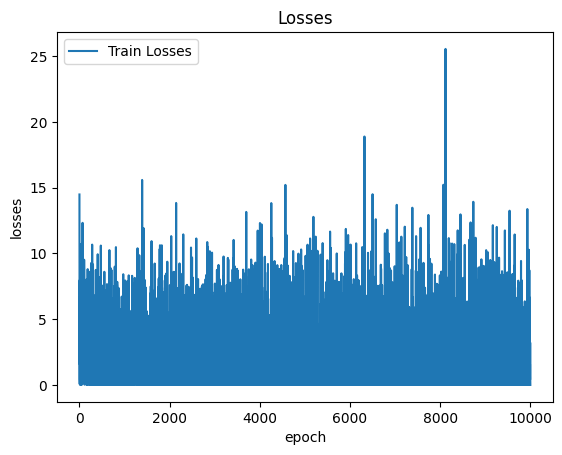

In [357]:
# Plotting the loss graph the graph of the best model
print("Best Model:")
print(f"Regularization: {best_reg_name}")
print(f"Method: {best_method}")
print(f"Final Training Loss: {best_train_loss}")
best_model.plot()
plt.show()

Configure MLflow for experiment tracking in a Dockerized setup, and setting the experiment name and overriding the default user ID.

In [358]:
from sklearn.metrics import classification_report as sklearn_classification_report

# Assuming best_model is already defined based on the previous code

# Use the best model to predict
yhat = best_model.predict(X_test)

# Custom classification report
custom_classification_report = best_model.classification_report(y_test, yhat)
print("*" * 5, "Custom Classification report", "*" * 5)
print(custom_classification_report)

# Sklearn's classification report
sklearn_report = sklearn_classification_report(y_test, yhat)
print("\n")
print("*" * 5, "Sklearn's Classification report", "*" * 5)
print(sklearn_report)

***** Custom Classification report *****
         precision    recall  f1-score
0         0.782828   0.72205  0.751212
1         0.494413  0.282748  0.359756
2              0.5  0.001767  0.003521
3         0.394231       1.0  0.565517
accuracy                      0.504979
macro     0.542868  0.501641  0.420002
weighted  0.548935  0.504979  0.429704


***** Sklearn's Classification report *****
              precision    recall  f1-score   support

           0       0.78      0.72      0.75       644
           1       0.49      0.28      0.36       626
           2       0.50      0.00      0.00       566
           3       0.39      1.00      0.57       574

    accuracy                           0.50      2410
   macro avg       0.54      0.50      0.42      2410
weighted avg       0.55      0.50      0.43      2410



In [364]:
import pickle

filename = 'Model/A3_car_prediction.model'
pickle.dump(model, open(filename, 'wb'))

scaler_path = 'Model/A3_prediction_scalar.model'
pickle.dump(scaler, open(scaler_path, 'wb'))

label_path = 'Model/A3_brand_label.model'
pickle.dump(original_brands, open(label_path, 'wb'))

In [363]:
print(model)

https://mlflow.ml.brain.cs.ait.ac.th/#/experiments/442617570942485080/runs/affa6ea96a9a4b42938895d7753ae526

In [398]:
## Registering the model with best run id
import mlflow
from mlflow.tracking import MlflowClient

# MLflow client
client = MlflowClient()

# Your new model name
model_name = "st126222-a3-model"

# Best run info
best_run_id = "affa6ea96a9a4b42938895d7753ae526"
model_uri = f"runs:/{best_run_id}/model"  # Assuming your model artifact is saved under "model"

# Check if the model already exists and delete if needed
try:
    client.delete_registered_model(name=model_name)
    print(f"Deleted existing registered model '{model_name}'")
except Exception as e:
    print(f"No existing model to delete or error: {e}")

# Register the new model
registered_model = mlflow.register_model(model_uri=model_uri, name=model_name)
print(f"Registered new model '{model_name}' with version: {registered_model.version}")

Deleted existing registered model 'st126222-a3-model'


Successfully registered model 'st126222-a3-model'.
2025/10/04 16:57:11 WARNING mlflow.tracking._model_registry.fluent: Run with id affa6ea96a9a4b42938895d7753ae526 has no artifacts at artifact path 'model', registering model based on models:/m-31174258c90242009ca0654a2dcdf5e3 instead
2025/10/04 16:57:11 INFO mlflow.store.model_registry.abstract_store: Waiting up to 300 seconds for model version to finish creation. Model name: st126222-a3-model, version 1
Created version '1' of model 'st126222-a3-model'.


Registered new model 'st126222-a3-model' with version: 1


In [399]:
from mlflow.tracking import MlflowClient
import time

client = MlflowClient()
model_name = "st126222-a3-model"
version = 1   # whichever version you just registered

while True:
    mv = client.get_model_version(name=model_name, version=version)
    print(f"Version {version} status: {mv.status}")
    if mv.status == "READY":
        print("✅ Model is READY to use!")
        break
    elif mv.status == "FAILED_REGISTRATION":
        print("❌ Model failed to register")
        break
    else:
        print("⏳ Still waiting...")
        time.sleep(2)

Version 1 status: READY
✅ Model is READY to use!


In [401]:
from mlflow.tracking import MlflowClient

client = MlflowClient()
for model in client.get_registered_model("st126222-a3-model").latest_versions:
    print(model)
    #Find model in staging

    if(model.current_stage == "Staging"):
        version = model.version
        client.transition_model_version_stage(
            name="st126222-a3-model", version = version, stage= "Production", archive_existing_versions= True
        )

<ModelVersion: aliases=[], creation_timestamp=1759571825827, current_stage='None', deployment_job_state=<ModelVersionDeploymentJobState: current_task_name='', job_id='', job_state='DEPLOYMENT_JOB_CONNECTION_STATE_UNSPECIFIED', run_id='', run_state='DEPLOYMENT_JOB_RUN_STATE_UNSPECIFIED'>, description='', last_updated_timestamp=1759571825827, metrics=None, model_id=None, name='st126222-a3-model', params=None, run_id='affa6ea96a9a4b42938895d7753ae526', run_link='', source='models:/m-31174258c90242009ca0654a2dcdf5e3', status='READY', status_message=None, tags={}, user_id='', version='1'>


In [403]:
from mlflow.tracking import MlflowClient

client = MlflowClient()

# Promote version 1 of your model to Production
client.transition_model_version_stage(
    name="st126222-a3-model",
    version=1,
    stage="Production",
    archive_existing_versions=True
)

print("🚀 Model promoted to Production!")

MlflowException: API request to https://mlflow.ml.brain.cs.ait.ac.th/api/2.0/mlflow/model-versions/transition-stage failed with exception HTTPSConnectionPool(host='mlflow.ml.brain.cs.ait.ac.th', port=443): Max retries exceeded with url: /api/2.0/mlflow/model-versions/transition-stage (Caused by ResponseError('too many 500 error responses'))

In [376]:
# Best run id
run_id = "affa6ea96a9a4b42938895d7753ae526"

# Build the model URI (artifact path was "model" when you logged it)
model_uri = f"runs:/{run_id}/model"

# Load the model
model = mlflow.pyfunc.load_model(model_uri)

In [377]:
print(type(model))

<class 'mlflow.pyfunc.PyFuncModel'>


In [378]:
import pandas as pd
precited_selling_price= model.predict(pd.DataFrame(X_test))
precited_selling_price[:10]

array([2, 2, 2, 1, 3, 2, 3, 3, 3, 1])

In [379]:
y_test[:10]


array([2, 2, 1, 1, 3, 1, 2, 3, 1, 3])

In [385]:
sample_df = pd.DataFrame([[107, 100,2017, 'BMW']],
                         columns=['max_power', 'mileage', 'year', 'brand'])
sample_df

,max_power,mileage,year,brand
0,107,100,2017,BMW


In [386]:
sample_df['brand'] = label_encoder_brand.transform(sample_df['brand'])

In [387]:
sample_df

,max_power,mileage,year,brand
0,107,100,2017,3


In [389]:
sample_df = sample_df.astype("float64")
output = model.predict(sample_df)
print(output)

[3]


<h1> Report <h1>

The car prediction model is a basic machine learning model which predicts the price of a car based on the values of the features that the user has selected. 

The initial data set contained the features like: name(brand), year, km_driven, fuel, setter_type, trainsmission, owner, mileage, engine, max_power, torque, and seats. For the analysis we dropped and cleaned the data first for the analysis. We separated the string from the numerical values for the features fuel, mileage, engine, and maximum power. After performing the initial cleaning, an explanatory data analysis was performed to understand the nature of the features and their interdependency. A univariate analysis was performed using a distribution plot to observe the distribution of the data sets. Scatter plot was used to see the relationship between features and selling price. 

A correlation matrix was used to see the relation of the features with the selling price and select the most influential features. After analyzing the correlation matrix, maximum power, mileage, year, and brand were selected as important features for the analysis. After feature selection, the datasets were separated into train and test sets. About 30% of the dataset were separated into the test set. During the preprocessing step, median was used to fill the missing values of the maximum power and mean was used to fill the missing values of mileage. Our test set has no null values of the features that were selected.

<h1> Feature Selection<h1>

The features that were selected for analysis were as follows:

- Brand: The selling price of a car depends on the brand to some influential extent. The selling price of some luxury brands like BMW, Mercedes,etc. are higher than other brands. 

- Year of manufacture: It influences the selling price of the car because newly manufactured cars are sold for higher selling price than old price. 

- Maximum power: The cars with high power are priced higher due to their better performance and the use of higher level equipment. 

- Mileage: Cars which provide good mileage and better fuel efficiency can increase the demand of the product, and hence create a rise in its price. 

The other features like seats, seller type, and owner have lower influence than that of the selected features on the selling price. 


<h1>Models<h1>

We have used the following models: 
- Ridge
- Normal
- Lasso 
- Elastic Net

For each model the following were evaluated:

Initialization
- Xavier 
- Zero

Optimization 
- Batch
- Mini-batch
- Stochastic 

Feature Transformation
- Linear 
- Polynomial

Learning Rates:
- 0.01
- 0.001 
- 0.0001

Momentum:
- True
- False

<h1>Findings<h1>

From the experimentation it was found following as the best model:

- Model : Normal
- Initialization : Xavier
- Optimization : Stochastic
- Feature Transformation : Polynomial
- Learning Rates: 0.001
- Momentum : False

<h1>Model comparision table<h1>

| Model      | Best Avg R-squared (R2) | Best Mean Squared Error (MSE) | Best Model |
|------------|--------------------------|--------------------------------|------------|
| Ridge      | -9.39                    | 7.34                          | No         |
| Normal     | 0.81                     | 0.11                          | Yes        |
| Elastic Net| -8.04                   | 8.98                          | No         |
| Lasso      | 0.79                    | 0.148                        | No         |

<h1> Conclusions <h1>

The car price prediction model was developed by selecting and preprocessing key features such as brand, year, maximum power, and mileage, followed by extensive experimentation with different regression techniques and hyperparameters. Among Ridge, Lasso, Elastic Net, and Normal regression, the Normal model with Xavier initialization, stochastic optimization, polynomial feature transformation, a learning rate of 0.001, and momentum disabled achieved the best results, producing the lowest Mean Squared Error (0.11) and the highest R² score (0.81). These outcomes demonstrate that polynomial transformations combined with careful optimization and initialization allowed the model to capture non-linear relationships in the data more effectively, making it the most reliable approach for predicting car prices in this analysis.

<h1>ML Flow Screenshots<h1>

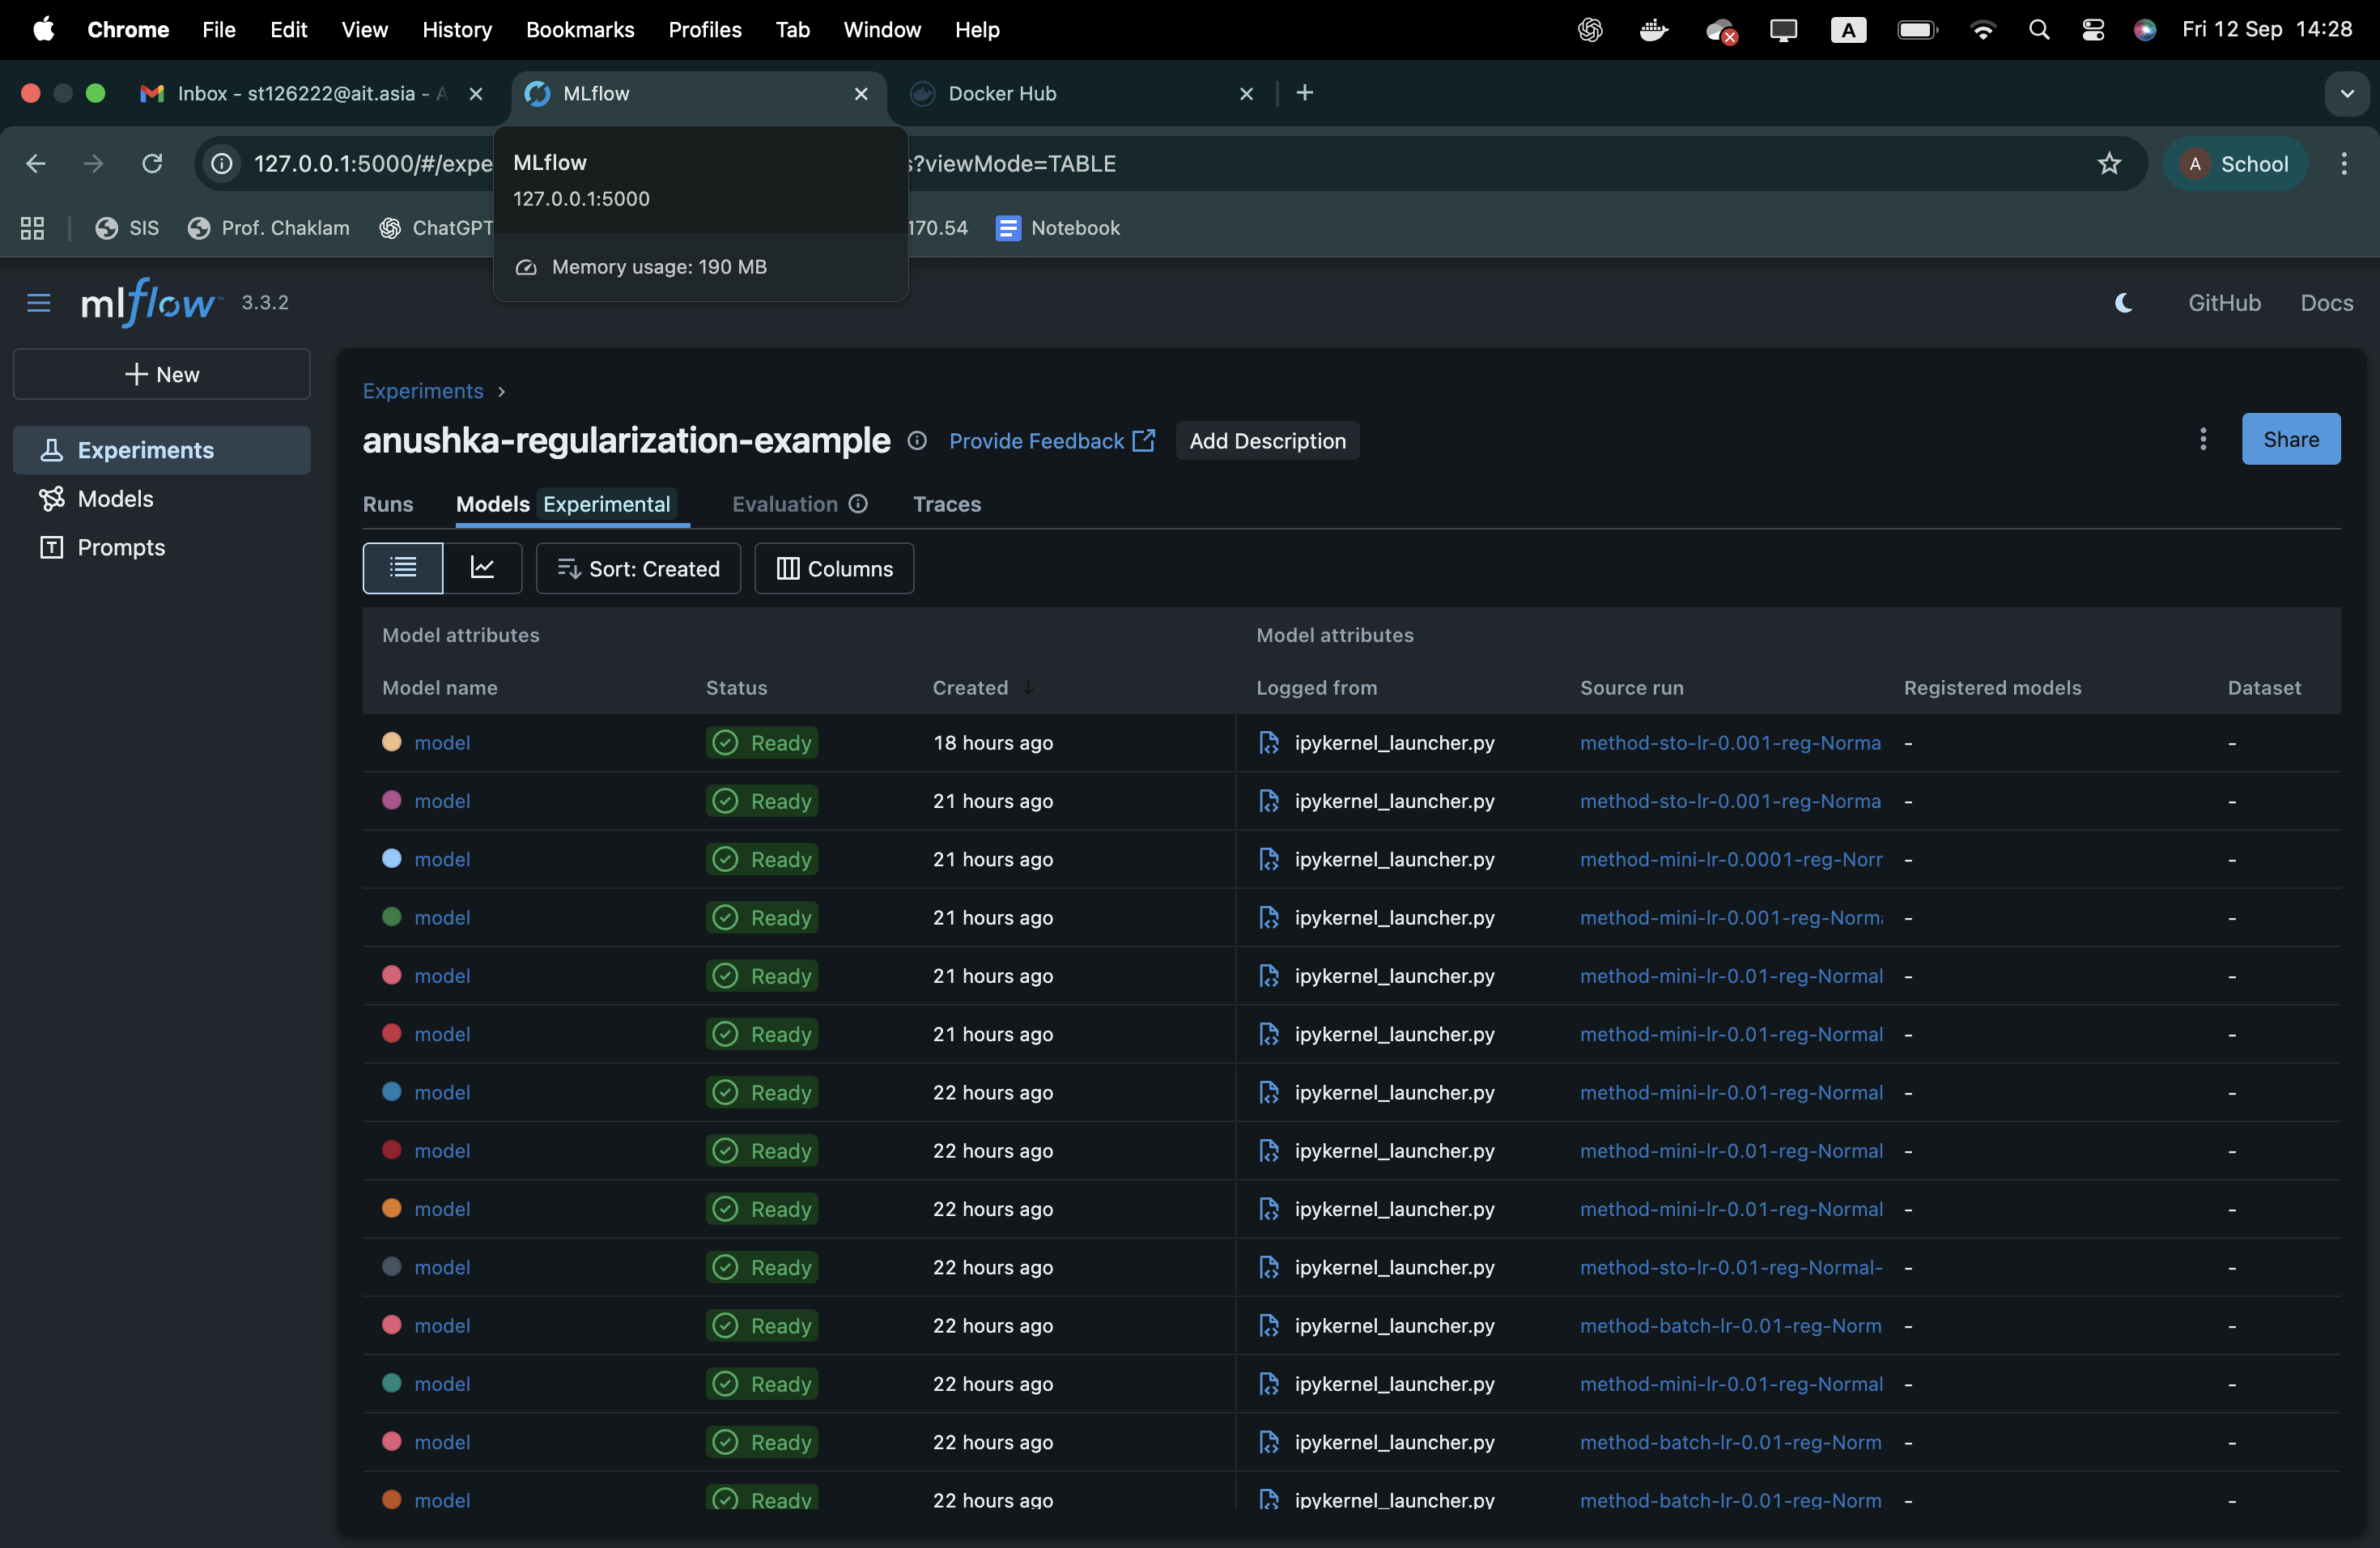

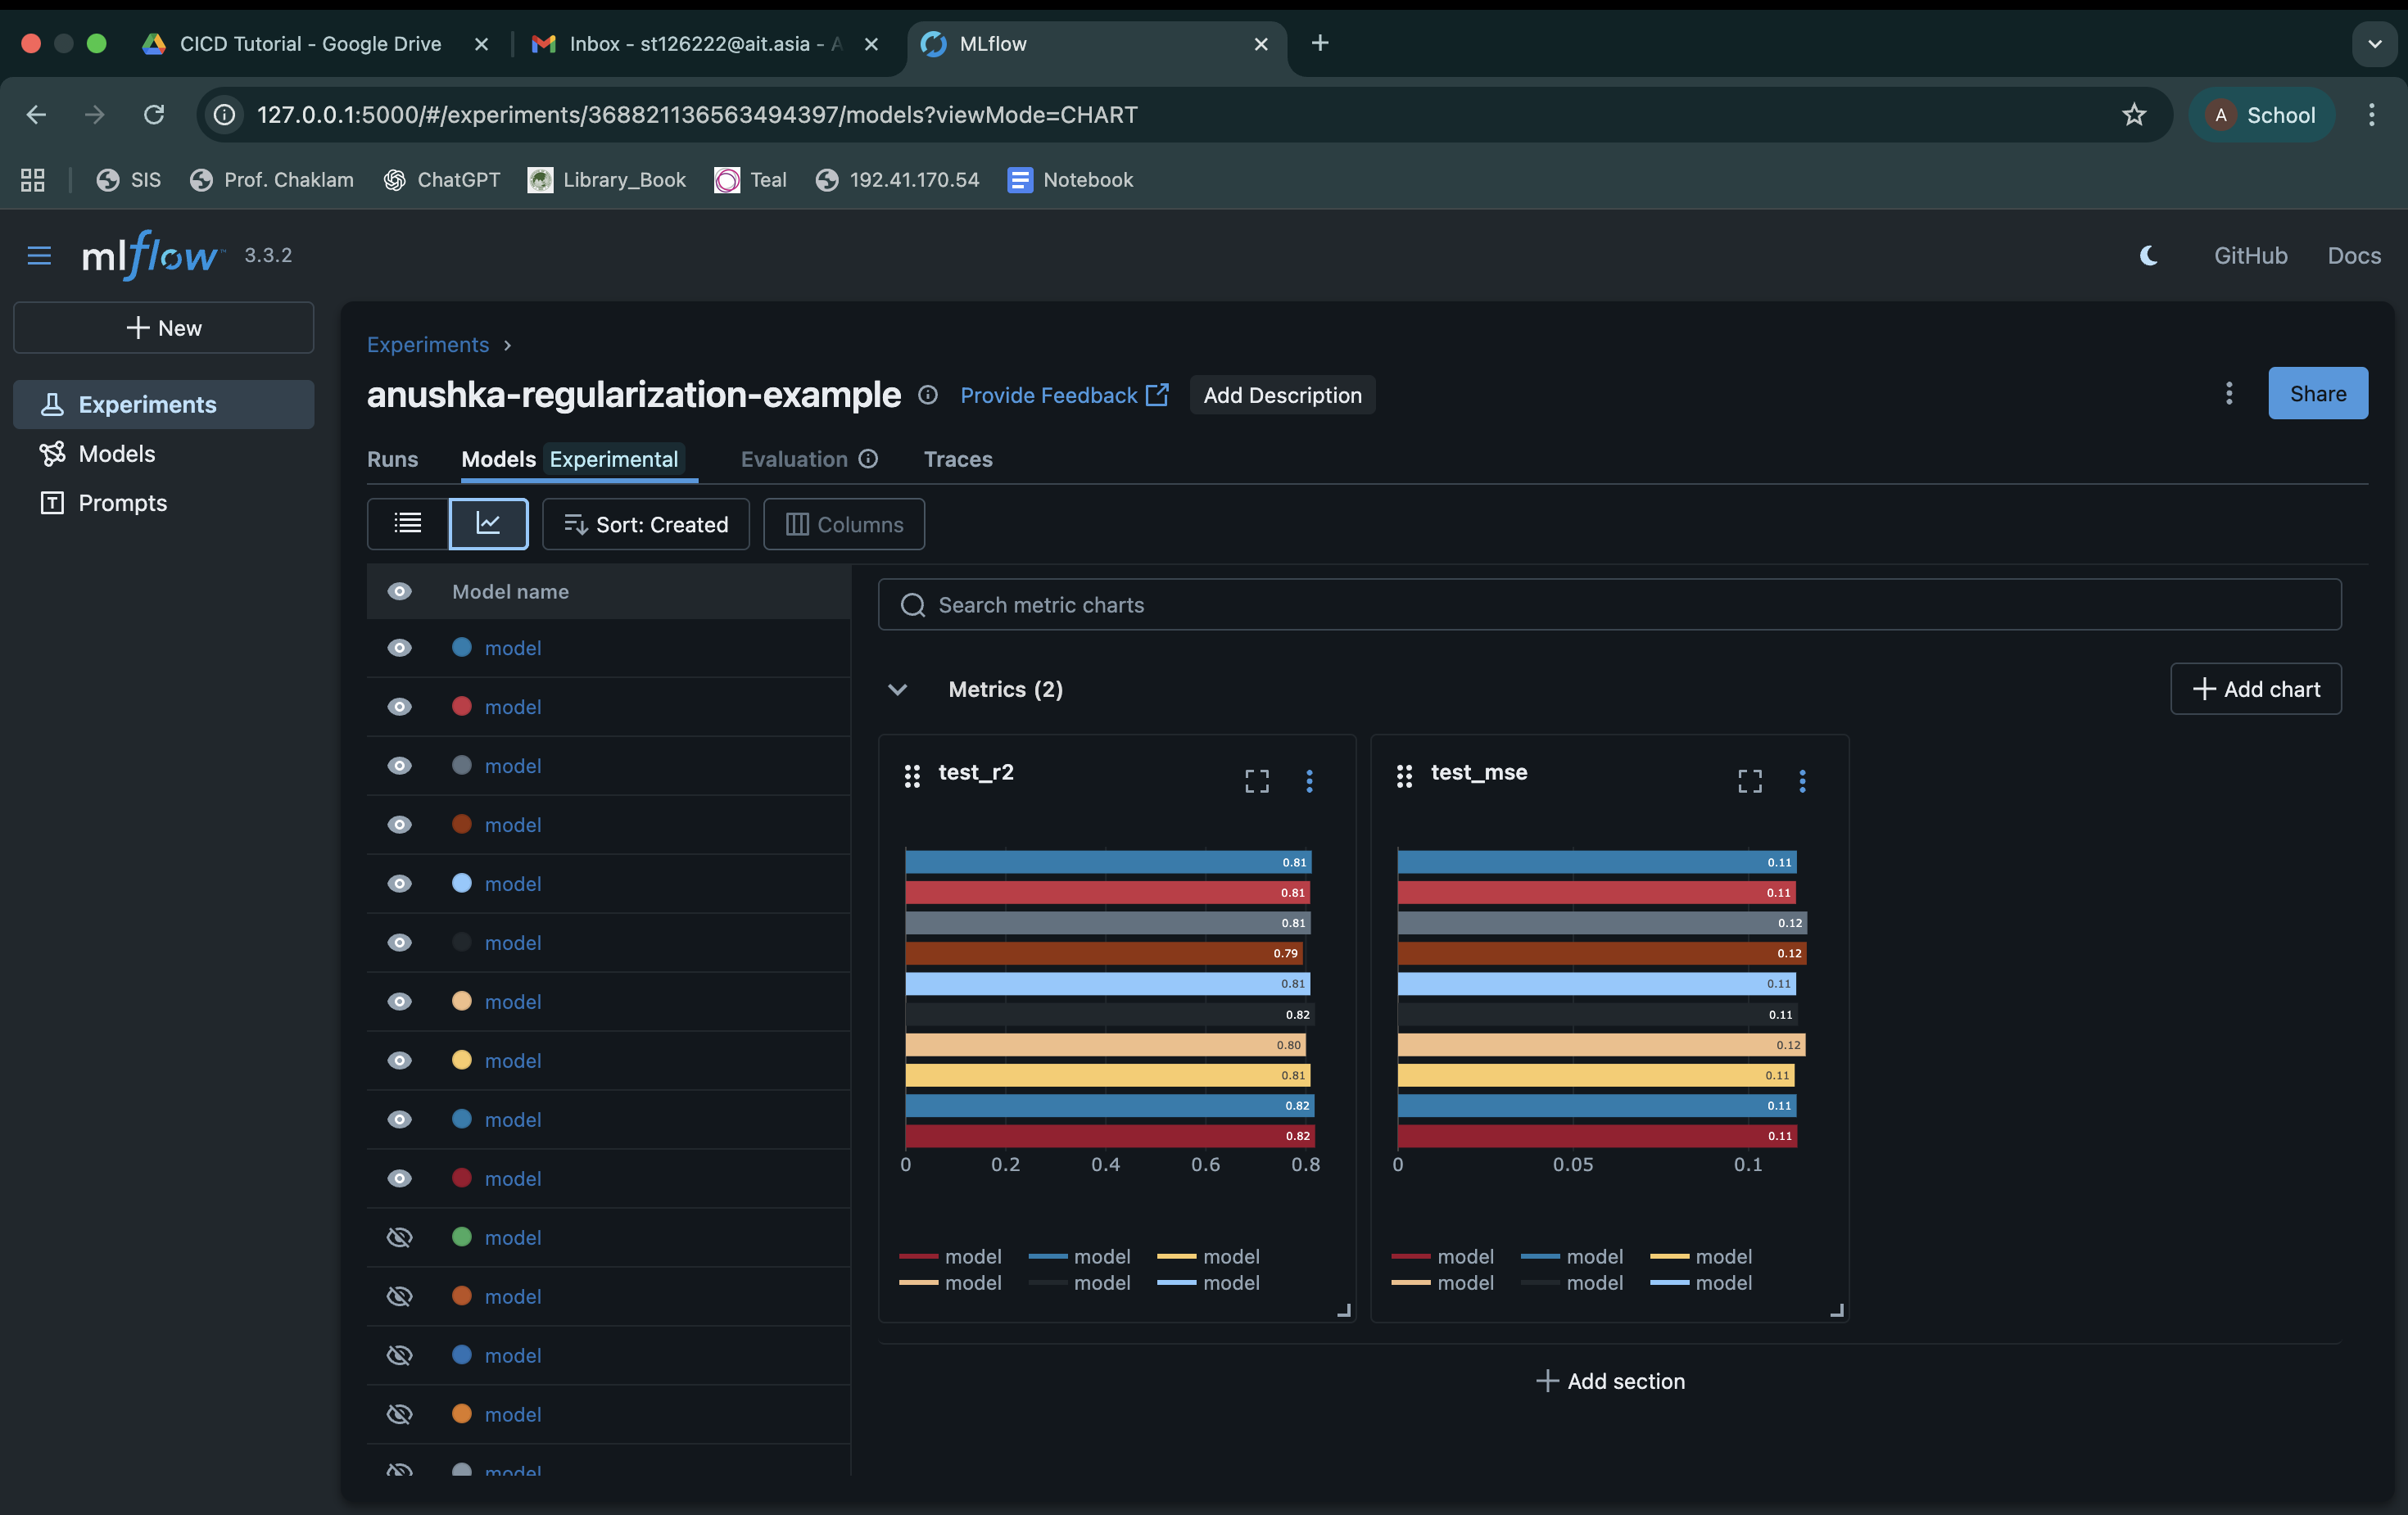